# Data Preprocessing

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingLR

In [10]:
# 1. Load training and testing datasets
train_data = pd.read_csv('./Google_Stock_Price_Train.csv')  # Replace with training dataset path
test_data = pd.read_csv('./Google_Stock_Price_Test.csv')   # Replace with testing dataset path

# Select relevant features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
train_data = train_data[features]
test_data = test_data[features]

# Check and fill missing values
train_data = train_data.ffill()
test_data = test_data.ffill()

# Convert data types (Volume and Close columns might be strings and need to be converted)
if train_data['Volume'].dtype == 'object':
    train_data['Volume'] = train_data['Volume'].str.replace(',', '').astype(int)
if test_data['Volume'].dtype == 'object':
    test_data['Volume'] = test_data['Volume'].str.replace(',', '').astype(int)

if train_data['Close'].dtype == 'object':
    train_data['Close'] = train_data['Close'].str.replace(',', '').astype(float)
if test_data['Close'].dtype == 'object':
    test_data['Close'] = test_data['Close'].str.replace(',', '').astype(float)

# 2. Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

# Convert to NumPy arrays for further processing
scaled_train_data = np.array(scaled_train_data)
scaled_test_data = np.array(scaled_test_data)

# 3. Create sliding windows
def create_sequences(data, N, M):
    """
    Create sliding windows for time series data.
    :param data: Input data array
    :param N: Number of past days (input window size)
    :param M: Number of future days (output window size)
    :return: Input sequence X and target sequence y
    """
    X, y = [], []
    for i in range(len(data) - N - M + 1):
        X.append(data[i:i + N])
        y.append(data[i + N:i + N + M])
    return np.array(X), np.array(y)

# Sliding window parameters
N_train, M_train = 30, 1  # Use 30 past days for training and validation
N_test, M_test = 10, 1    # Use 5 past days for testing

# Create sliding windows for training set
X_train_full, y_train_full = create_sequences(scaled_train_data, N_train, M_train)

# Create sliding windows for test set
X_test, y_test = create_sequences(scaled_test_data, N_test, M_test)

# Split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, shuffle=False)

# Output dataset shapes
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Validation set size: {X_val.shape}, {y_val.shape}")
print(f"Test set size: {X_test.shape}, {y_test.shape}")

Training set size: (982, 30, 5), (982, 1, 5)
Validation set size: (246, 30, 5), (246, 1, 5)
Test set size: (10, 10, 5), (10, 1, 5)


# Vanilla RNN

Epoch 1/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 123.49batch/s, Validation Loss=0.0497]


Epoch [1/50] - Train Loss: 0.0545, Validation Loss: 0.0361


Epoch 2/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 185.73batch/s, Validation Loss=0.00934]


Epoch [2/50] - Train Loss: 0.0078, Validation Loss: 0.0060


Epoch 3/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 362.57batch/s, Validation Loss=0.00561]


Epoch [3/50] - Train Loss: 0.0024, Validation Loss: 0.0037


Epoch 4/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 986.72batch/s, Validation Loss=0.00468]


Epoch [4/50] - Train Loss: 0.0020, Validation Loss: 0.0033


Epoch 5/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1176.19batch/s, Validation Loss=0.00362]


Epoch [5/50] - Train Loss: 0.0018, Validation Loss: 0.0026


Epoch 6/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 517.39batch/s, Validation Loss=0.0019]


Epoch [6/50] - Train Loss: 0.0017, Validation Loss: 0.0014


Epoch 7/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 396.55batch/s, Validation Loss=0.00237]


Epoch [7/50] - Train Loss: 0.0017, Validation Loss: 0.0018


Epoch 8/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 533.08batch/s, Validation Loss=0.00237]


Epoch [8/50] - Train Loss: 0.0017, Validation Loss: 0.0018


Epoch 9/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 467.49batch/s, Validation Loss=0.0014]


Epoch [9/50] - Train Loss: 0.0017, Validation Loss: 0.0013


Epoch 10/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 695.44batch/s, Validation Loss=0.00185]


Epoch [10/50] - Train Loss: 0.0016, Validation Loss: 0.0016


Epoch 11/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 665.62batch/s, Validation Loss=0.00118]


Epoch [11/50] - Train Loss: 0.0015, Validation Loss: 0.0010


Epoch 12/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1133.98batch/s, Validation Loss=0.00131]


Epoch [12/50] - Train Loss: 0.0015, Validation Loss: 0.0011


Epoch 13/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1135.09batch/s, Validation Loss=0.00081]


Epoch [13/50] - Train Loss: 0.0014, Validation Loss: 0.0007


Epoch 14/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 726.99batch/s, Validation Loss=0.000897]


Epoch [14/50] - Train Loss: 0.0014, Validation Loss: 0.0009


Epoch 15/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 788.55batch/s, Validation Loss=0.000489]


Epoch [15/50] - Train Loss: 0.0014, Validation Loss: 0.0006


Epoch 16/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 855.67batch/s, Validation Loss=0.000767]


Epoch [16/50] - Train Loss: 0.0014, Validation Loss: 0.0008


Epoch 17/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1105.25batch/s, Validation Loss=0.00103]


Epoch [17/50] - Train Loss: 0.0014, Validation Loss: 0.0010


Epoch 18/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1033.84batch/s, Validation Loss=0.000829]


Epoch [18/50] - Train Loss: 0.0013, Validation Loss: 0.0008


Epoch 19/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 787.09batch/s, Validation Loss=0.000611]


Epoch [19/50] - Train Loss: 0.0013, Validation Loss: 0.0007


Epoch 20/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 476.44batch/s, Validation Loss=0.000823]


Epoch [20/50] - Train Loss: 0.0013, Validation Loss: 0.0008


Epoch 21/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1085.45batch/s, Validation Loss=0.000896]


Epoch [21/50] - Train Loss: 0.0013, Validation Loss: 0.0008


Epoch 22/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 946.66batch/s, Validation Loss=0.000643]


Epoch [22/50] - Train Loss: 0.0014, Validation Loss: 0.0006


Epoch 23/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 856.05batch/s, Validation Loss=0.00063]


Epoch [23/50] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 24/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 665.91batch/s, Validation Loss=0.000524]


Epoch [24/50] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 25/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1073.02batch/s, Validation Loss=0.000996]


Epoch [25/50] - Train Loss: 0.0013, Validation Loss: 0.0009


Epoch 26/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1134.82batch/s, Validation Loss=0.000713]


Epoch [26/50] - Train Loss: 0.0013, Validation Loss: 0.0008


Epoch 27/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1128.18batch/s, Validation Loss=0.000983]


Epoch [27/50] - Train Loss: 0.0013, Validation Loss: 0.0011


Epoch 28/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1168.09batch/s, Validation Loss=0.000889]


Epoch [28/50] - Train Loss: 0.0013, Validation Loss: 0.0009


Epoch 29/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 633.46batch/s, Validation Loss=0.000443]


Epoch [29/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 30/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 645.89batch/s, Validation Loss=0.000505]


Epoch [30/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 31/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 745.04batch/s, Validation Loss=0.00102]


Epoch [31/50] - Train Loss: 0.0012, Validation Loss: 0.0010


Epoch 32/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 601.53batch/s, Validation Loss=0.00047]


Epoch [32/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 33/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 640.93batch/s, Validation Loss=0.000474]


Epoch [33/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 34/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1118.26batch/s, Validation Loss=0.000311]


Epoch [34/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 35/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1129.85batch/s, Validation Loss=0.000299]


Epoch [35/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 36/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1073.88batch/s, Validation Loss=0.000467]


Epoch [36/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 37/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 679.67batch/s, Validation Loss=0.000292]


Epoch [37/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 38/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 701.17batch/s, Validation Loss=0.000635]


Epoch [38/50] - Train Loss: 0.0012, Validation Loss: 0.0007


Epoch 39/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1094.80batch/s, Validation Loss=0.000667]


Epoch [39/50] - Train Loss: 0.0012, Validation Loss: 0.0007


Epoch 40/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 965.48batch/s, Validation Loss=0.000396]


Epoch [40/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 41/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 641.96batch/s, Validation Loss=0.000544]


Epoch [41/50] - Train Loss: 0.0012, Validation Loss: 0.0007


Epoch 42/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 751.58batch/s, Validation Loss=0.000324]


Epoch [42/50] - Train Loss: 0.0012, Validation Loss: 0.0004


Epoch 43/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1116.47batch/s, Validation Loss=0.000535]


Epoch [43/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 44/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 591.58batch/s, Validation Loss=0.000313]


Epoch [44/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 45/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 777.86batch/s, Validation Loss=0.000337]


Epoch [45/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 46/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 692.10batch/s, Validation Loss=0.000282]


Epoch [46/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 47/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 846.20batch/s, Validation Loss=0.000355]


Epoch [47/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 48/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 752.88batch/s, Validation Loss=0.000869]


Epoch [48/50] - Train Loss: 0.0012, Validation Loss: 0.0008


Epoch 49/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 829.41batch/s, Validation Loss=0.000518]


Epoch [49/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 50/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1063.94batch/s, Validation Loss=0.000847]


Epoch [50/50] - Train Loss: 0.0012, Validation Loss: 0.0008


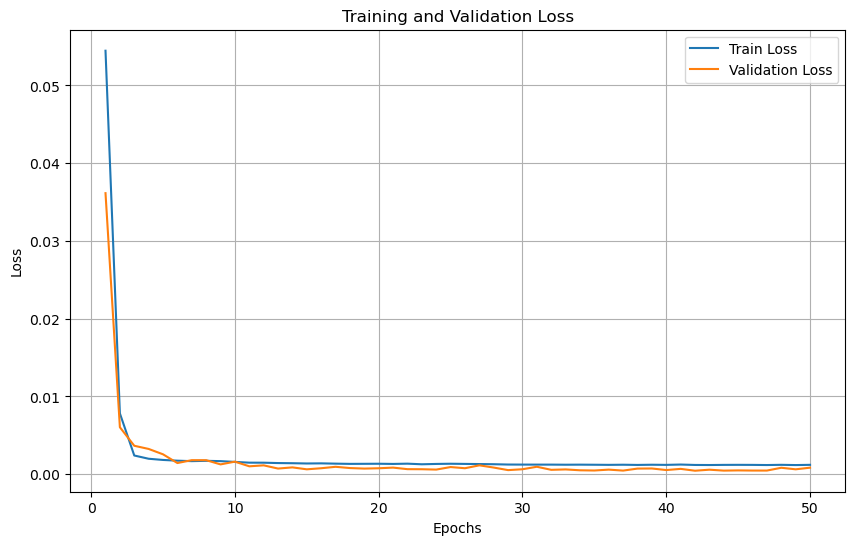

Test Loss: 0.0012


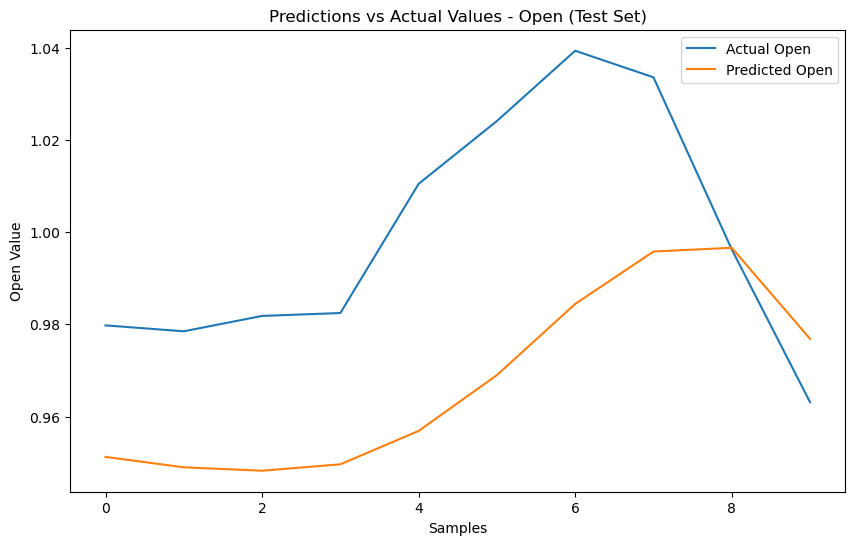

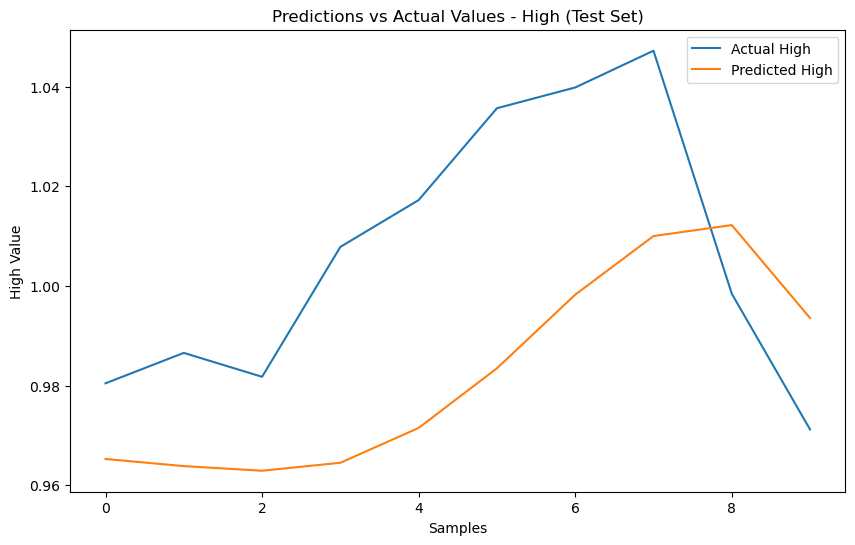

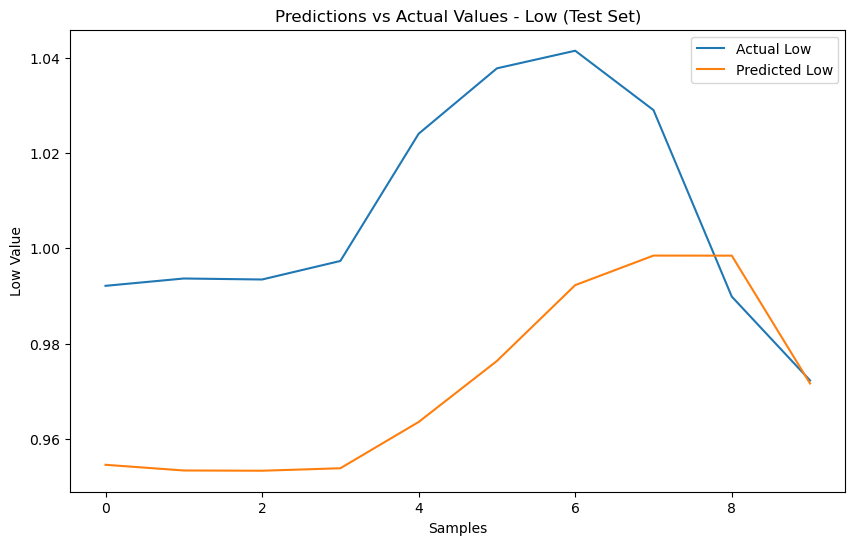

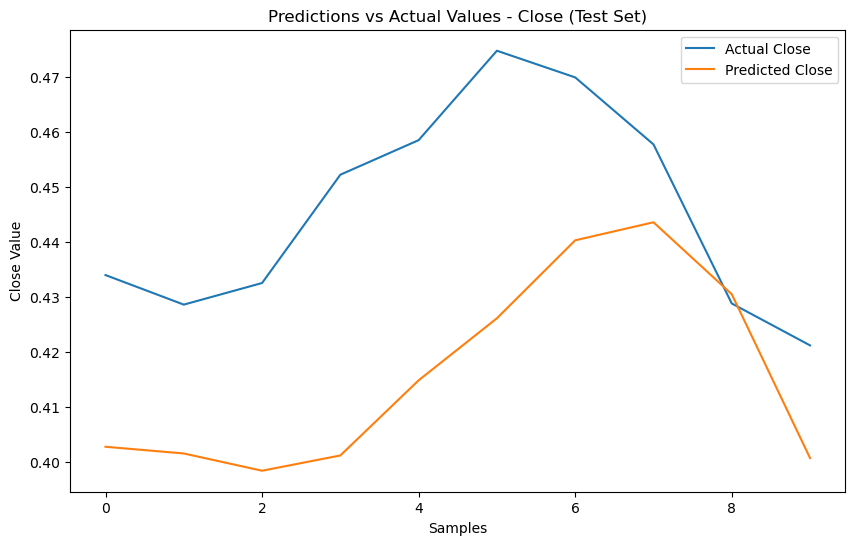

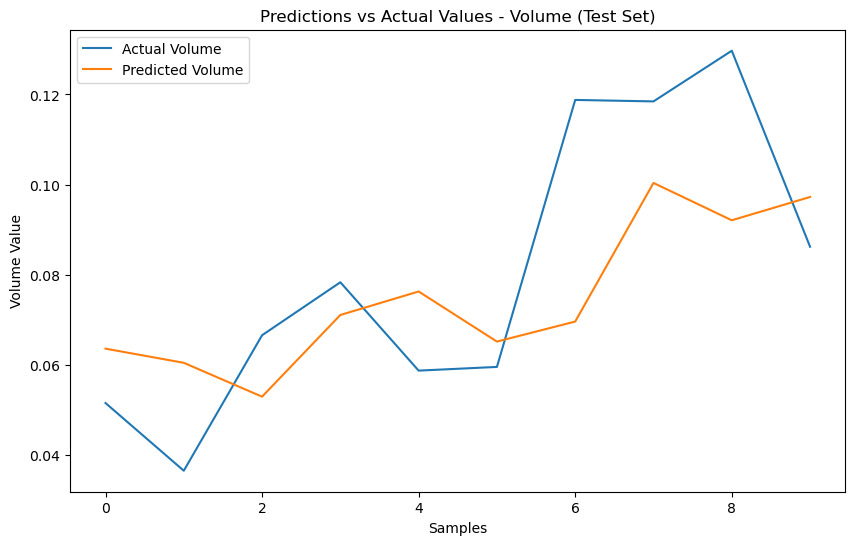

In [11]:
# Vanilla RNN model definition
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        """
        Initialize Vanilla RNN model.

        :param input_size: Number of input features (e.g., Open, High, Low, Close, Volume)
        :param hidden_size: Number of units in the hidden layer
        :param output_size: Number of output features (e.g., predict Open, High, Low, Close, Volume)
        :param num_layers: Number of RNN layers
        """
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # Take the last time step
        return out

# Model parameters
input_size = 5  # Features: Open, High, Low, Close, Volume
hidden_size = 64
output_size = 5  # Predict the same 5 features
num_layers = 1

# Initialize model
model = VanillaRNN(input_size, hidden_size, output_size, num_layers)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression tasks
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Prepare datasets and dataloaders
batch_size = 32
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Training process
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    # Training loop
    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training", unit="batch") as pbar:
        for X_batch, y_batch in pbar:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch[:, -1, :])
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            pbar.set_postfix({"Train Loss": loss.item()})

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation loop
    model.eval()
    val_loss = 0.0
    with tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation", unit="batch") as pbar:
        with torch.no_grad():
            for X_batch, y_batch in pbar:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch[:, -1, :])
                val_loss += loss.item()
                pbar.set_postfix({"Validation Loss": loss.item()})

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Visualize training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()

# Test process
test_loss = 0.0
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch[:, -1, :])
        test_loss += loss.item()
        predictions.append(outputs.cpu().numpy())
        actuals.append(y_batch.cpu().numpy())

test_loss /= len(test_loader)
print(f"Test Loss: {test_loss:.4f}")

# Convert predictions and actuals to NumPy format
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Ensure actuals has the correct shape
actuals = actuals.squeeze(axis=1)  # Squeeze the second dimension

# Plot predictions vs actual values for each feature
features = ['Open', 'High', 'Low', 'Close', 'Volume']
for i in range(output_size):
    plt.figure(figsize=(10, 6))
    plt.plot(actuals[:, i], label=f"Actual {features[i]}")
    plt.plot(predictions[:, i], label=f"Predicted {features[i]}")
    plt.legend()
    plt.title(f"Predictions vs Actual Values - {features[i]} (Test Set)")
    plt.xlabel("Samples")
    plt.ylabel(f"{features[i]} Value")
    plt.show()

C:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
Epoch 1/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 184.56batch/s, Validation Loss=0.0571]


Epoch [1/50] - Train Loss: 0.0471, Validation Loss: 0.0421


Epoch 2/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 456.70batch/s, Validation Loss=0.0083]


Epoch [2/50] - Train Loss: 0.0067, Validation Loss: 0.0053


Epoch 3/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 526.61batch/s, Validation Loss=0.00747]


Epoch [3/50] - Train Loss: 0.0022, Validation Loss: 0.0052


Epoch 4/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 807.31batch/s, Validation Loss=0.00407]


Epoch [4/50] - Train Loss: 0.0019, Validation Loss: 0.0028


Epoch 5/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 649.99batch/s, Validation Loss=0.00341]


Epoch [5/50] - Train Loss: 0.0018, Validation Loss: 0.0024


Epoch 6/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 716.65batch/s, Validation Loss=0.00129]


Epoch [6/50] - Train Loss: 0.0016, Validation Loss: 0.0011


Epoch 7/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 928.38batch/s, Validation Loss=0.00224]


Epoch [7/50] - Train Loss: 0.0017, Validation Loss: 0.0017


Epoch 8/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 882.29batch/s, Validation Loss=0.00257]


Epoch [8/50] - Train Loss: 0.0016, Validation Loss: 0.0020


Epoch 9/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 779.03batch/s, Validation Loss=0.00113]


Epoch [9/50] - Train Loss: 0.0016, Validation Loss: 0.0009


Epoch 10/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 538.07batch/s, Validation Loss=0.00146]


Epoch [10/50] - Train Loss: 0.0016, Validation Loss: 0.0013


Epoch 11/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1051.96batch/s, Validation Loss=0.00112]


Epoch [11/50] - Train Loss: 0.0015, Validation Loss: 0.0010


Epoch 12/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1045.41batch/s, Validation Loss=0.000841]


Epoch [12/50] - Train Loss: 0.0015, Validation Loss: 0.0008


Epoch 13/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 653.60batch/s, Validation Loss=0.00117]


Epoch [13/50] - Train Loss: 0.0015, Validation Loss: 0.0010


Epoch 14/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 723.14batch/s, Validation Loss=0.00155]


Epoch [14/50] - Train Loss: 0.0014, Validation Loss: 0.0013


Epoch 15/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1048.97batch/s, Validation Loss=0.000807]


Epoch [15/50] - Train Loss: 0.0014, Validation Loss: 0.0008


Epoch 16/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 513.28batch/s, Validation Loss=0.00127]


Epoch [16/50] - Train Loss: 0.0014, Validation Loss: 0.0011


Epoch 17/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 879.03batch/s, Validation Loss=0.00121]


Epoch [17/50] - Train Loss: 0.0014, Validation Loss: 0.0011


Epoch 18/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1027.39batch/s, Validation Loss=0.000584]


Epoch [18/50] - Train Loss: 0.0013, Validation Loss: 0.0007


Epoch 19/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1028.27batch/s, Validation Loss=0.00102]


Epoch [19/50] - Train Loss: 0.0014, Validation Loss: 0.0010


Epoch 20/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 797.89batch/s, Validation Loss=0.00122]


Epoch [20/50] - Train Loss: 0.0013, Validation Loss: 0.0011


Epoch 21/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 699.71batch/s, Validation Loss=0.000713]


Epoch [21/50] - Train Loss: 0.0013, Validation Loss: 0.0007


Epoch 22/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 633.88batch/s, Validation Loss=0.0004]


Epoch [22/50] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 23/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 575.76batch/s, Validation Loss=0.000764]


Epoch [23/50] - Train Loss: 0.0013, Validation Loss: 0.0008


Epoch 24/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 980.89batch/s, Validation Loss=0.000823]


Epoch [24/50] - Train Loss: 0.0013, Validation Loss: 0.0008


Epoch 25/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1221.05batch/s, Validation Loss=0.000436]


Epoch [25/50] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 26/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1040.35batch/s, Validation Loss=0.000546]


Epoch [26/50] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 27/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1031.05batch/s, Validation Loss=0.000621]


Epoch [27/50] - Train Loss: 0.0013, Validation Loss: 0.0007


Epoch 28/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1009.00batch/s, Validation Loss=0.000912]


Epoch 00028: reducing learning rate of group 0 to 5.0000e-04.
Epoch [28/50] - Train Loss: 0.0013, Validation Loss: 0.0009


Epoch 29/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1167.07batch/s, Validation Loss=0.000572]


Epoch [29/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 30/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 985.47batch/s, Validation Loss=0.000498]


Epoch [30/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 31/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 783.71batch/s, Validation Loss=0.000417]


Epoch [31/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 32/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 777.44batch/s, Validation Loss=0.000469]


Epoch [32/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 33/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1133.67batch/s, Validation Loss=0.000334]


Epoch [33/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 34/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1000.13batch/s, Validation Loss=0.000613]


Epoch [34/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 35/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 806.48batch/s, Validation Loss=0.000466]


Epoch [35/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 36/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 686.83batch/s, Validation Loss=0.000613]


Epoch [36/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 37/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 781.61batch/s, Validation Loss=0.000642]


Epoch [37/50] - Train Loss: 0.0012, Validation Loss: 0.0007


Epoch 38/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1061.48batch/s, Validation Loss=0.000484]


Epoch [38/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 39/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1150.58batch/s, Validation Loss=0.000683]


Epoch 00039: reducing learning rate of group 0 to 2.5000e-04.
Epoch [39/50] - Train Loss: 0.0013, Validation Loss: 0.0007


Epoch 40/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1164.07batch/s, Validation Loss=0.000656]


Epoch [40/50] - Train Loss: 0.0012, Validation Loss: 0.0007


Epoch 41/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1022.07batch/s, Validation Loss=0.000508]


Epoch [41/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 42/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 892.93batch/s, Validation Loss=0.000394]


Epoch [42/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 43/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1224.12batch/s, Validation Loss=0.000384]


Epoch [43/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 44/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1224.26batch/s, Validation Loss=0.000417]


Epoch [44/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 45/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 996.39batch/s, Validation Loss=0.000369]


Epoch [45/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 46/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1038.42batch/s, Validation Loss=0.00039]


Epoch [46/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 47/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 967.07batch/s, Validation Loss=0.000433]


Epoch [47/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 48/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1223.90batch/s, Validation Loss=0.000439]


Epoch [48/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 49/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 982.85batch/s, Validation Loss=0.000325]


Epoch [49/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 50/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1003.60batch/s, Validation Loss=0.000505]


Epoch [50/50] - Train Loss: 0.0012, Validation Loss: 0.0006


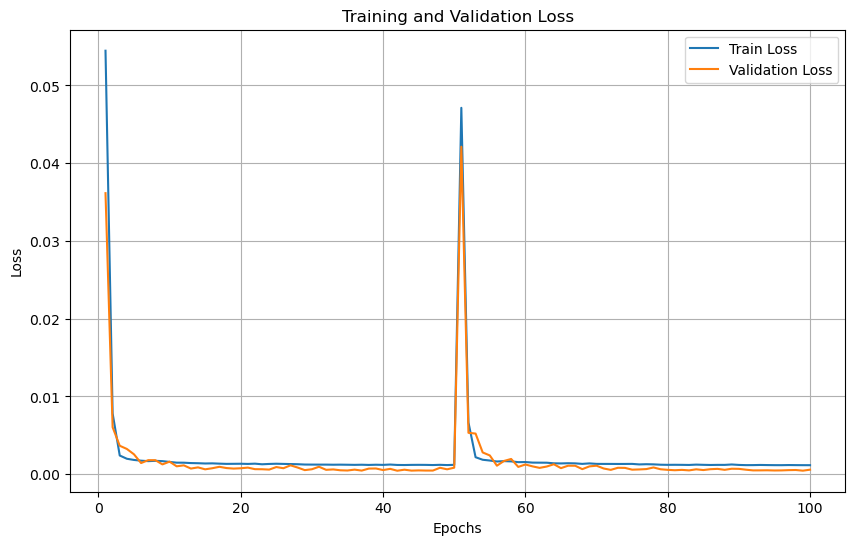

Test Loss: 0.0010


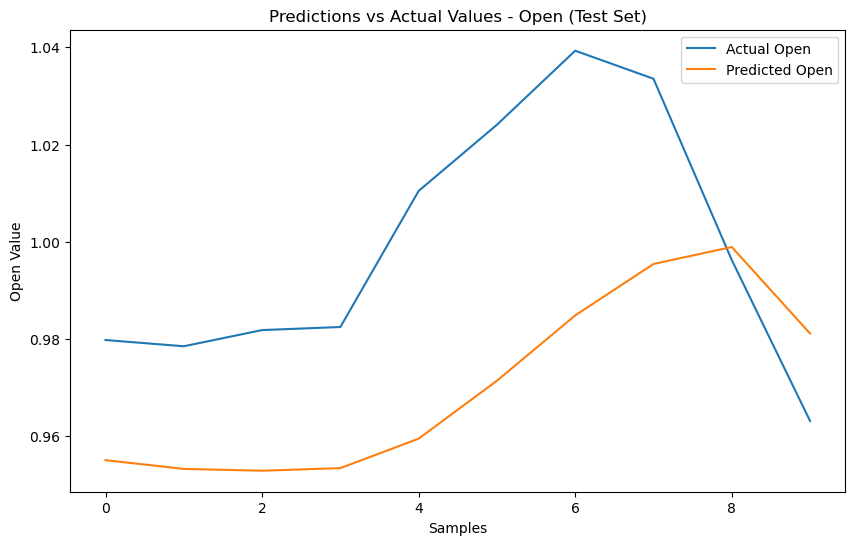

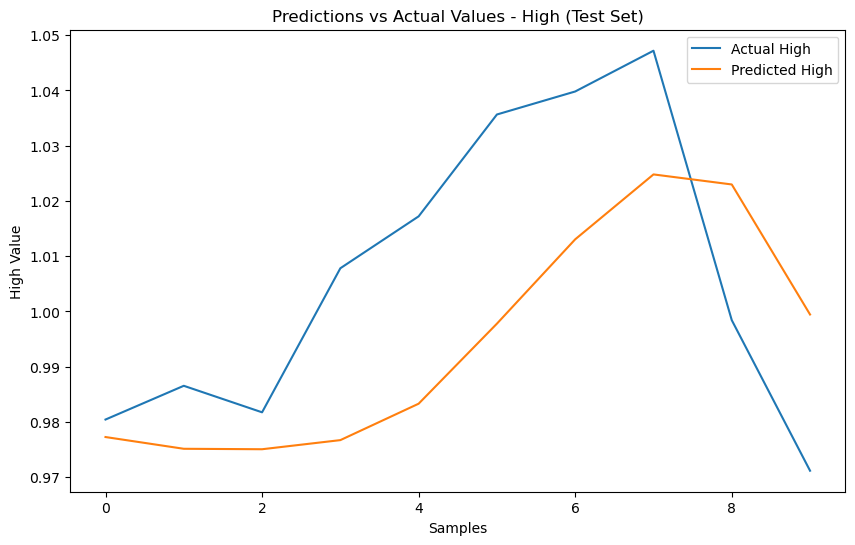

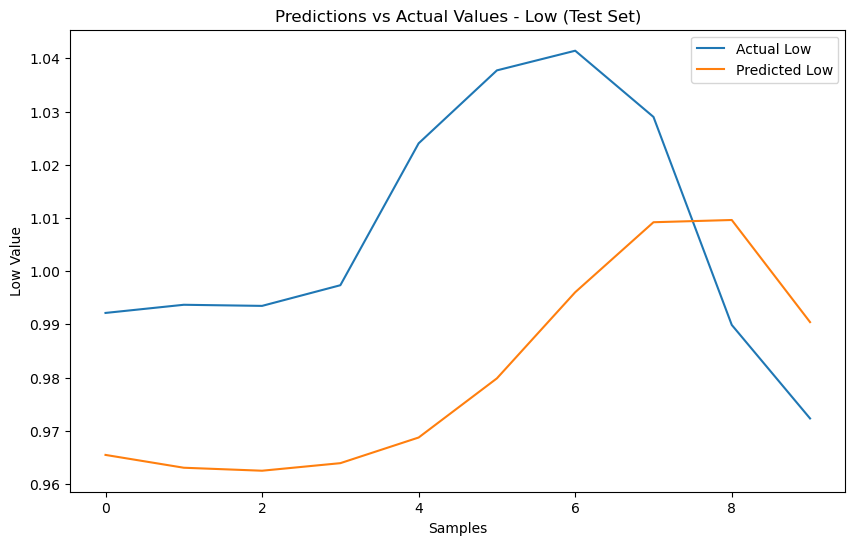

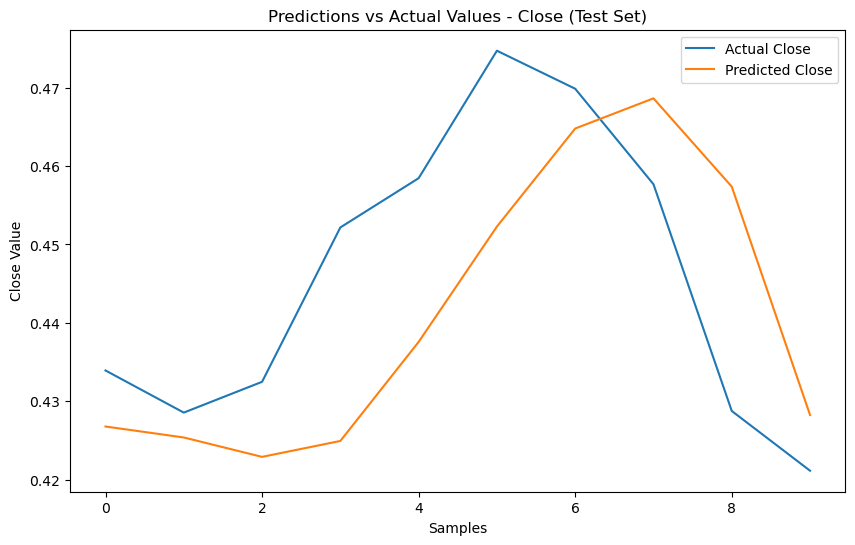

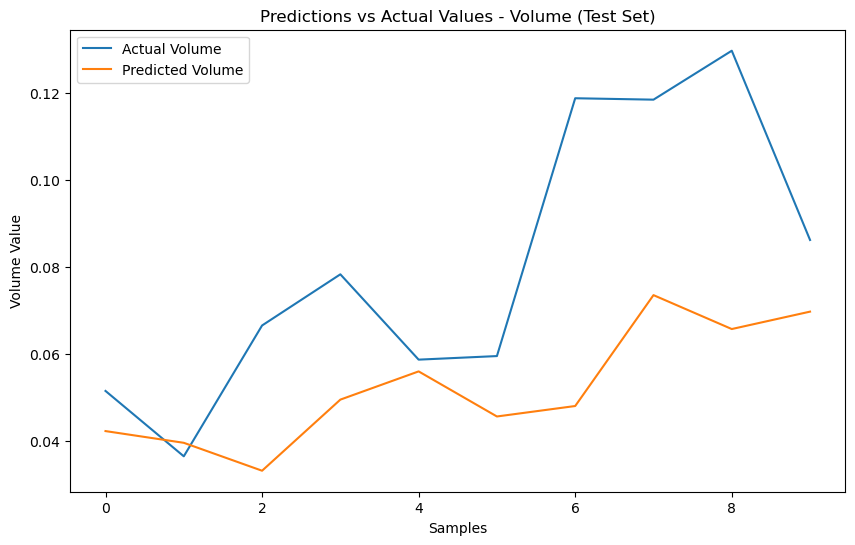

In [12]:
# Vanilla RNN model with Dropout (no need to redefine unchanged sections)
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, dropout=0.2):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Updated model initialization with Dropout
model = VanillaRNN(input_size, hidden_size, output_size, num_layers=1, dropout=0.2).to(device)

# Optimizer and Learning Rate Scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

# Early stopping parameters
early_stopping_patience = 10
best_val_loss = float('inf')
early_stopping_counter = 0

# Updated training loop with early stopping and scheduler
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    # Training loop
    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training", unit="batch") as pbar:
        for X_batch, y_batch in pbar:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch[:, -1, :])
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            pbar.set_postfix({"Train Loss": loss.item()})

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation loop
    model.eval()
    val_loss = 0.0
    with tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation", unit="batch") as pbar:
        with torch.no_grad():
            for X_batch, y_batch in pbar:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch[:, -1, :])
                val_loss += loss.item()
                pbar.set_postfix({"Validation Loss": loss.item()})

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    # Step scheduler
    scheduler.step(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()  # Save the best model state
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered!")
            model.load_state_dict(best_model_state)  # Restore best model
            break

# Visualization of training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()

# Testing remains unchanged
test_loss = 0.0
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch[:, -1, :])
        test_loss += loss.item()
        predictions.append(outputs.cpu().numpy())
        actuals.append(y_batch.cpu().numpy())

test_loss /= len(test_loader)
print(f"Test Loss: {test_loss:.4f}")

# Predictions vs Actuals visualization remains unchanged
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)
actuals = actuals.squeeze(axis=1)  # Ensure correct shape

features = ['Open', 'High', 'Low', 'Close', 'Volume']
for i in range(output_size):
    plt.figure(figsize=(10, 6))
    plt.plot(actuals[:, i], label=f"Actual {features[i]}")
    plt.plot(predictions[:, i], label=f"Predicted {features[i]}")
    plt.legend()
    plt.title(f"Predictions vs Actual Values - {features[i]} (Test Set)")
    plt.xlabel("Samples")
    plt.ylabel(f"{features[i]} Value")
    plt.show()

Epoch 1/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 730.68batch/s, Validation Loss=0.032]


Epoch [1/100] - Train Loss: 0.0438, Validation Loss: 0.0232


Epoch 2/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 738.66batch/s, Validation Loss=0.00277]


Epoch [2/100] - Train Loss: 0.0043, Validation Loss: 0.0021


Epoch 3/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 892.81batch/s, Validation Loss=0.00286]


Epoch [3/100] - Train Loss: 0.0020, Validation Loss: 0.0022


Epoch 4/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 982.36batch/s, Validation Loss=0.00299]


Epoch [4/100] - Train Loss: 0.0019, Validation Loss: 0.0023


Epoch 5/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 855.74batch/s, Validation Loss=0.00168]


Epoch [5/100] - Train Loss: 0.0018, Validation Loss: 0.0013


Epoch 6/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 961.17batch/s, Validation Loss=0.00156]


Epoch [6/100] - Train Loss: 0.0017, Validation Loss: 0.0013


Epoch 7/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1092.52batch/s, Validation Loss=0.00205]


Epoch [7/100] - Train Loss: 0.0017, Validation Loss: 0.0016


Epoch 8/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 644.34batch/s, Validation Loss=0.0019]


Epoch [8/100] - Train Loss: 0.0016, Validation Loss: 0.0016


Epoch 9/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 956.57batch/s, Validation Loss=0.000892]


Epoch [9/100] - Train Loss: 0.0017, Validation Loss: 0.0009


Epoch 10/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 974.46batch/s, Validation Loss=0.00113]


Epoch [10/100] - Train Loss: 0.0016, Validation Loss: 0.0010


Epoch 11/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 864.85batch/s, Validation Loss=0.00137]


Epoch [11/100] - Train Loss: 0.0015, Validation Loss: 0.0012


Epoch 12/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 990.36batch/s, Validation Loss=0.00191]


Epoch [12/100] - Train Loss: 0.0015, Validation Loss: 0.0016


Epoch 13/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1040.61batch/s, Validation Loss=0.000896]


Epoch [13/100] - Train Loss: 0.0015, Validation Loss: 0.0008


Epoch 14/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 923.37batch/s, Validation Loss=0.00117]


Epoch [14/100] - Train Loss: 0.0015, Validation Loss: 0.0010


Epoch 15/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 908.89batch/s, Validation Loss=0.000848]


Epoch [15/100] - Train Loss: 0.0015, Validation Loss: 0.0008


Epoch 16/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 889.66batch/s, Validation Loss=0.000871]


Epoch [16/100] - Train Loss: 0.0014, Validation Loss: 0.0008


Epoch 17/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 857.91batch/s, Validation Loss=0.0011]


Epoch [17/100] - Train Loss: 0.0014, Validation Loss: 0.0010


Epoch 18/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 865.63batch/s, Validation Loss=0.000611]


Epoch [18/100] - Train Loss: 0.0014, Validation Loss: 0.0007


Epoch 19/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 560.93batch/s, Validation Loss=0.000772]


Epoch [19/100] - Train Loss: 0.0014, Validation Loss: 0.0008


Epoch 20/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 933.70batch/s, Validation Loss=0.000888]


Epoch [20/100] - Train Loss: 0.0014, Validation Loss: 0.0009


Epoch 21/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 950.20batch/s, Validation Loss=0.0011]


Epoch [21/100] - Train Loss: 0.0014, Validation Loss: 0.0010


Epoch 22/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 972.93batch/s, Validation Loss=0.000596]


Epoch [22/100] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 23/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 643.68batch/s, Validation Loss=0.00107]


Epoch [23/100] - Train Loss: 0.0014, Validation Loss: 0.0010


Epoch 24/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 595.86batch/s, Validation Loss=0.000663]


Epoch [24/100] - Train Loss: 0.0013, Validation Loss: 0.0008


Epoch 25/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 533.36batch/s, Validation Loss=0.00119]


Epoch [25/100] - Train Loss: 0.0013, Validation Loss: 0.0012


Epoch 26/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 666.70batch/s, Validation Loss=0.00086]


Epoch [26/100] - Train Loss: 0.0013, Validation Loss: 0.0010


Epoch 27/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 808.93batch/s, Validation Loss=0.000329]


Epoch [27/100] - Train Loss: 0.0013, Validation Loss: 0.0005


Epoch 28/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 958.94batch/s, Validation Loss=0.000485]


Epoch [28/100] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 29/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 770.50batch/s, Validation Loss=0.000621]


Epoch [29/100] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 30/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 854.45batch/s, Validation Loss=0.000463]


Epoch [30/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 31/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 906.71batch/s, Validation Loss=0.000667]


Epoch [31/100] - Train Loss: 0.0012, Validation Loss: 0.0007


Epoch 32/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1097.63batch/s, Validation Loss=0.00043]


Epoch [32/100] - Train Loss: 0.0013, Validation Loss: 0.0005


Epoch 33/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 936.78batch/s, Validation Loss=0.000912]


Epoch [33/100] - Train Loss: 0.0012, Validation Loss: 0.0009


Epoch 34/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1089.96batch/s, Validation Loss=0.000402]


Epoch [34/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 35/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 985.27batch/s, Validation Loss=0.00039]


Epoch [35/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 36/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1005.23batch/s, Validation Loss=0.000861]


Epoch [36/100] - Train Loss: 0.0012, Validation Loss: 0.0009


Epoch 37/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 545.42batch/s, Validation Loss=0.000434]


Epoch [37/100] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 38/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1116.29batch/s, Validation Loss=0.000793]


Epoch 00038: reducing learning rate of group 0 to 5.0000e-04.
Epoch [38/100] - Train Loss: 0.0012, Validation Loss: 0.0008


Epoch 39/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1080.90batch/s, Validation Loss=0.000672]


Epoch [39/100] - Train Loss: 0.0012, Validation Loss: 0.0007


Epoch 40/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 961.94batch/s, Validation Loss=0.000634]


Epoch [40/100] - Train Loss: 0.0012, Validation Loss: 0.0007


Epoch 41/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 845.28batch/s, Validation Loss=0.000527]


Epoch [41/100] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 42/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1063.36batch/s, Validation Loss=0.000381]


Epoch [42/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 43/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 285.83batch/s, Validation Loss=0.000545]


Epoch [43/100] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 44/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 947.49batch/s, Validation Loss=0.000393]


Epoch [44/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 45/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 864.56batch/s, Validation Loss=0.000379]


Epoch [45/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 46/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1095.15batch/s, Validation Loss=0.000476]


Epoch [46/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 47/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 666.68batch/s, Validation Loss=0.000578]


Epoch [47/100] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 48/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 484.73batch/s, Validation Loss=0.000565]


Epoch 00048: reducing learning rate of group 0 to 2.5000e-04.
Epoch [48/100] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 49/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 682.18batch/s, Validation Loss=0.000407]


Epoch [49/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 50/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 645.03batch/s, Validation Loss=0.000409]


Epoch [50/100] - Train Loss: 0.0011, Validation Loss: 0.0005


Epoch 51/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 777.35batch/s, Validation Loss=0.000404]


Epoch [51/100] - Train Loss: 0.0011, Validation Loss: 0.0005


Epoch 52/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 983.91batch/s, Validation Loss=0.000354]


Epoch [52/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 53/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 849.20batch/s, Validation Loss=0.000461]


Epoch [53/100] - Train Loss: 0.0011, Validation Loss: 0.0006


Epoch 54/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 860.52batch/s, Validation Loss=0.000449]


Epoch [54/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 55/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 951.71batch/s, Validation Loss=0.000339]


Epoch [55/100] - Train Loss: 0.0011, Validation Loss: 0.0004


Epoch 56/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 874.66batch/s, Validation Loss=0.000368]


Epoch [56/100] - Train Loss: 0.0011, Validation Loss: 0.0005


Epoch 57/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1058.33batch/s, Validation Loss=0.000468]


Epoch [57/100] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 58/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 904.75batch/s, Validation Loss=0.000334]


Epoch [58/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 59/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 799.47batch/s, Validation Loss=0.000389]


Epoch [59/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 60/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 976.75batch/s, Validation Loss=0.000342]


Epoch [60/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 61/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 951.06batch/s, Validation Loss=0.000444]


Epoch 00061: reducing learning rate of group 0 to 1.2500e-04.
Epoch [61/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 62/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 931.39batch/s, Validation Loss=0.000379]


Epoch [62/100] - Train Loss: 0.0011, Validation Loss: 0.0005


Epoch 63/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 830.80batch/s, Validation Loss=0.000359]


Epoch [63/100] - Train Loss: 0.0011, Validation Loss: 0.0005


Epoch 64/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 933.75batch/s, Validation Loss=0.000377]


Epoch [64/100] - Train Loss: 0.0011, Validation Loss: 0.0005


Epoch 65/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 959.38batch/s, Validation Loss=0.000347]


Epoch [65/100] - Train Loss: 0.0011, Validation Loss: 0.0005
Early stopping triggered.


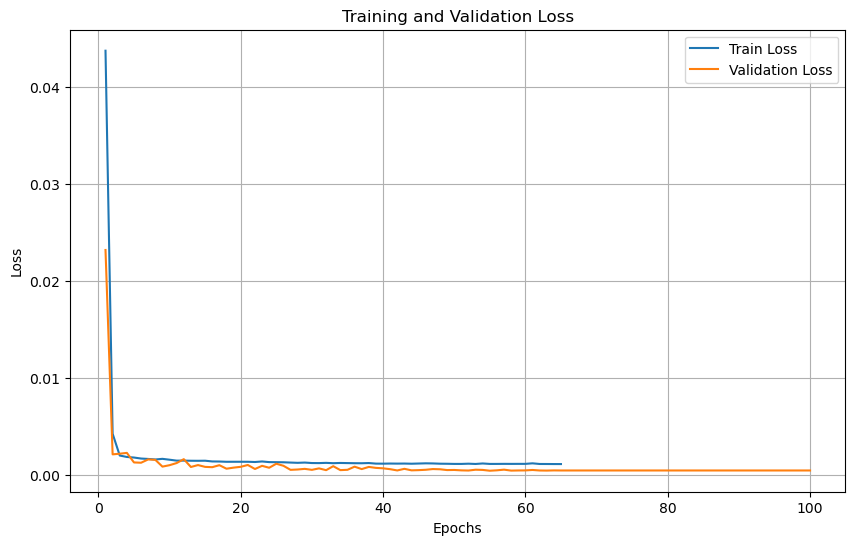

Test Loss: 0.0007


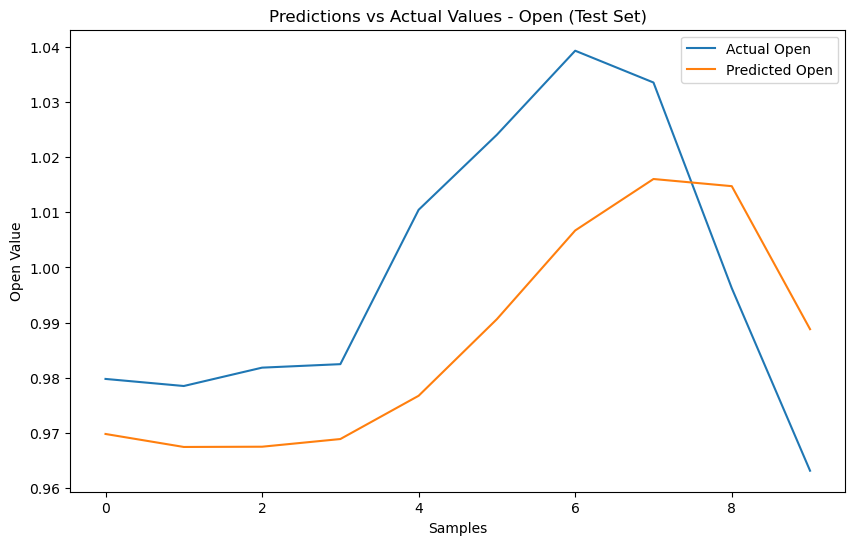

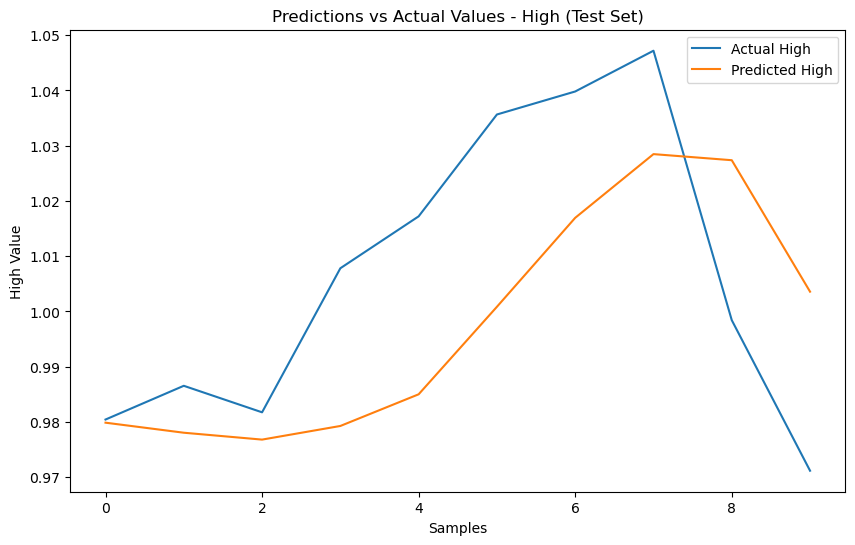

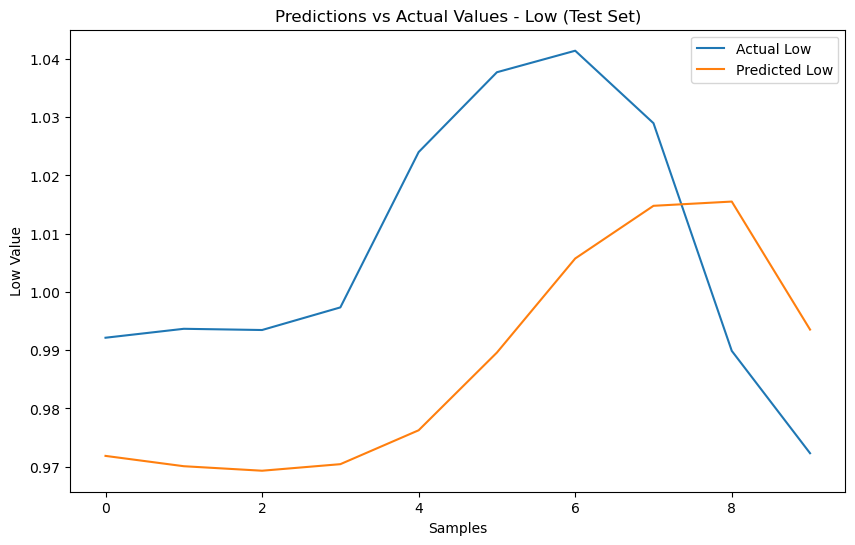

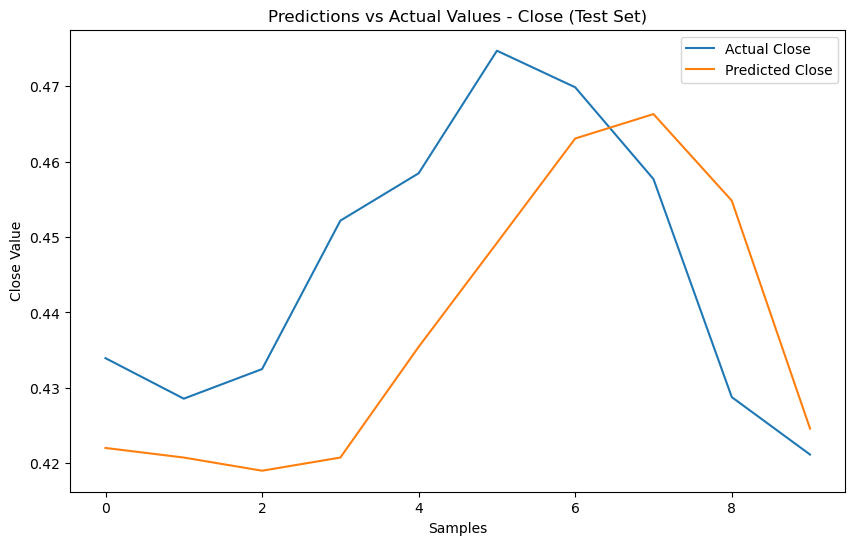

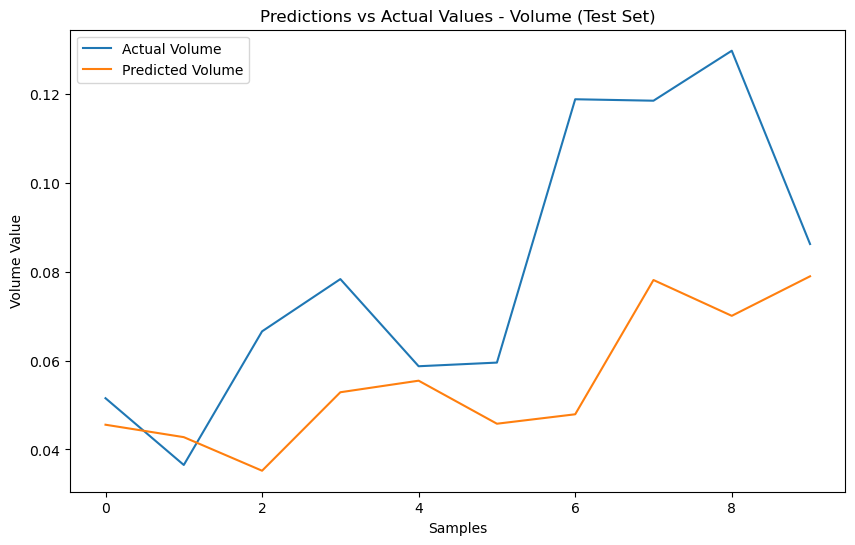

In [17]:
# Enhanced Vanilla RNN model with Dropout
class EnhancedVanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, dropout=0.2):
        """
        Initialize Enhanced Vanilla RNN model with Dropout.

        :param input_size: Number of input features (e.g., Open, High, Low, Close, Volume)
        :param hidden_size: Number of units in the hidden layer
        :param output_size: Number of output features (e.g., predict Open, High, Low, Close, Volume)
        :param num_layers: Number of RNN layers
        :param dropout: Dropout rate
        """
        super(EnhancedVanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # Take the last time step
        return out

# Using the enhanced model
model = EnhancedVanillaRNN(input_size, hidden_size, output_size, num_layers=1, dropout=0.2).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5) 

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

patience = 10
early_stopping_counter = 0
best_val_loss = float('inf')
best_model_state = None

num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    # Training loop
    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training", unit="batch") as pbar:
        for X_batch, y_batch in pbar:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch[:, -1, :])
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            pbar.set_postfix({"Train Loss": loss.item()})

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation loop
    model.eval()
    val_loss = 0.0
    with tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation", unit="batch") as pbar:
        with torch.no_grad():
            for X_batch, y_batch in pbar:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch[:, -1, :])
                val_loss += loss.item()
                pbar.set_postfix({"Validation Loss": loss.item()})

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    scheduler.step(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if early_stopping_counter >= patience:
        print("Early stopping triggered.")
        model.load_state_dict(best_model_state)  
        break

if len(val_losses) < num_epochs:
    val_losses.extend([val_losses[-1]] * (num_epochs - len(val_losses)))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()

test_loss = 0.0
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch[:, -1, :])
        test_loss += loss.item()
        predictions.append(outputs.cpu().numpy())
        actuals.append(y_batch.cpu().numpy())

test_loss /= len(test_loader)
print(f"Test Loss: {test_loss:.4f}")

predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

actuals = actuals.squeeze(axis=1)

features = ['Open', 'High', 'Low', 'Close', 'Volume']
for i in range(output_size):
    plt.figure(figsize=(10, 6))
    plt.plot(actuals[:, i], label=f"Actual {features[i]}")
    plt.plot(predictions[:, i], label=f"Predicted {features[i]}")
    plt.legend()
    plt.title(f"Predictions vs Actual Values - {features[i]} (Test Set)")
    plt.xlabel("Samples")
    plt.ylabel(f"{features[i]} Value")
    plt.show()

# LSTM model

Epoch 1/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 400.16batch/s, Validation Loss=0.0735]


Epoch [1/50] - Train Loss: 0.0658, Validation Loss: 0.0584


Epoch 2/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 217.98batch/s, Validation Loss=0.0258]


Epoch [2/50] - Train Loss: 0.0151, Validation Loss: 0.0218


Epoch 3/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 215.19batch/s, Validation Loss=0.00175]


Epoch [3/50] - Train Loss: 0.0041, Validation Loss: 0.0024


Epoch 4/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1060.47batch/s, Validation Loss=0.0023]


Epoch [4/50] - Train Loss: 0.0027, Validation Loss: 0.0022


Epoch 5/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1014.34batch/s, Validation Loss=0.00095]


Epoch [5/50] - Train Loss: 0.0023, Validation Loss: 0.0010


Epoch 6/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 519.10batch/s, Validation Loss=0.00201]


Epoch [6/50] - Train Loss: 0.0022, Validation Loss: 0.0017


Epoch 7/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1004.02batch/s, Validation Loss=0.000603]


Epoch [7/50] - Train Loss: 0.0021, Validation Loss: 0.0008


Epoch 8/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1029.28batch/s, Validation Loss=0.00121]


Epoch [8/50] - Train Loss: 0.0019, Validation Loss: 0.0012


Epoch 9/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 542.17batch/s, Validation Loss=0.00134]


Epoch [9/50] - Train Loss: 0.0021, Validation Loss: 0.0014


Epoch 10/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 871.52batch/s, Validation Loss=0.0017]


Epoch [10/50] - Train Loss: 0.0019, Validation Loss: 0.0014


Epoch 11/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1177.31batch/s, Validation Loss=0.00063]


Epoch [11/50] - Train Loss: 0.0019, Validation Loss: 0.0010


Epoch 12/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 999.18batch/s, Validation Loss=0.000779]


Epoch [12/50] - Train Loss: 0.0018, Validation Loss: 0.0009


Epoch 13/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 708.42batch/s, Validation Loss=0.000458]


Epoch [13/50] - Train Loss: 0.0018, Validation Loss: 0.0008


Epoch 14/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 757.54batch/s, Validation Loss=0.00125]


Epoch [14/50] - Train Loss: 0.0018, Validation Loss: 0.0012


Epoch 15/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1223.59batch/s, Validation Loss=0.000599]


Epoch [15/50] - Train Loss: 0.0017, Validation Loss: 0.0008


Epoch 16/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1005.77batch/s, Validation Loss=0.00075]


Epoch [16/50] - Train Loss: 0.0018, Validation Loss: 0.0008


Epoch 17/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 975.56batch/s, Validation Loss=0.000593]


Epoch [17/50] - Train Loss: 0.0017, Validation Loss: 0.0008


Epoch 18/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1018.07batch/s, Validation Loss=0.000862]


Epoch [18/50] - Train Loss: 0.0016, Validation Loss: 0.0009


Epoch 19/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 999.74batch/s, Validation Loss=0.00188]


Epoch [19/50] - Train Loss: 0.0017, Validation Loss: 0.0018


Epoch 20/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 963.65batch/s, Validation Loss=0.000798]


Epoch [20/50] - Train Loss: 0.0017, Validation Loss: 0.0008


Epoch 21/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 970.48batch/s, Validation Loss=0.000758]


Epoch [21/50] - Train Loss: 0.0016, Validation Loss: 0.0008


Epoch 22/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 705.34batch/s, Validation Loss=0.000627]


Epoch [22/50] - Train Loss: 0.0016, Validation Loss: 0.0008


Epoch 23/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 711.22batch/s, Validation Loss=0.0009]


Epoch [23/50] - Train Loss: 0.0015, Validation Loss: 0.0010


Epoch 24/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1117.40batch/s, Validation Loss=0.00106]


Epoch [24/50] - Train Loss: 0.0016, Validation Loss: 0.0010


Epoch 25/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 912.87batch/s, Validation Loss=0.000701]


Epoch [25/50] - Train Loss: 0.0016, Validation Loss: 0.0009


Epoch 26/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 756.82batch/s, Validation Loss=0.00155]


Epoch [26/50] - Train Loss: 0.0016, Validation Loss: 0.0015


Epoch 27/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 832.99batch/s, Validation Loss=0.000658]


Epoch [27/50] - Train Loss: 0.0015, Validation Loss: 0.0008


Epoch 28/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 897.35batch/s, Validation Loss=0.000487]


Epoch [28/50] - Train Loss: 0.0015, Validation Loss: 0.0007


Epoch 29/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1046.97batch/s, Validation Loss=0.000468]


Epoch [29/50] - Train Loss: 0.0015, Validation Loss: 0.0007


Epoch 30/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1038.42batch/s, Validation Loss=0.000683]


Epoch [30/50] - Train Loss: 0.0015, Validation Loss: 0.0008


Epoch 31/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1031.94batch/s, Validation Loss=0.000886]


Epoch [31/50] - Train Loss: 0.0014, Validation Loss: 0.0009


Epoch 32/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 922.99batch/s, Validation Loss=0.000682]


Epoch [32/50] - Train Loss: 0.0015, Validation Loss: 0.0009


Epoch 33/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 896.10batch/s, Validation Loss=0.000704]


Epoch [33/50] - Train Loss: 0.0014, Validation Loss: 0.0009


Epoch 34/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1081.18batch/s, Validation Loss=0.000464]


Epoch [34/50] - Train Loss: 0.0015, Validation Loss: 0.0007


Epoch 35/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 915.54batch/s, Validation Loss=0.000853]


Epoch [35/50] - Train Loss: 0.0014, Validation Loss: 0.0009


Epoch 36/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 915.91batch/s, Validation Loss=0.000432]


Epoch [36/50] - Train Loss: 0.0014, Validation Loss: 0.0006


Epoch 37/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 919.10batch/s, Validation Loss=0.000656]


Epoch [37/50] - Train Loss: 0.0014, Validation Loss: 0.0007


Epoch 38/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 855.72batch/s, Validation Loss=0.000966]


Epoch [38/50] - Train Loss: 0.0014, Validation Loss: 0.0010


Epoch 39/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1013.48batch/s, Validation Loss=0.000446]


Epoch [39/50] - Train Loss: 0.0014, Validation Loss: 0.0007


Epoch 40/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1074.02batch/s, Validation Loss=0.000415]


Epoch [40/50] - Train Loss: 0.0014, Validation Loss: 0.0006


Epoch 41/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 971.18batch/s, Validation Loss=0.000768]


Epoch [41/50] - Train Loss: 0.0014, Validation Loss: 0.0009


Epoch 42/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 867.98batch/s, Validation Loss=0.000352]


Epoch [42/50] - Train Loss: 0.0014, Validation Loss: 0.0006


Epoch 43/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1055.50batch/s, Validation Loss=0.000425]


Epoch [43/50] - Train Loss: 0.0014, Validation Loss: 0.0006


Epoch 44/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1069.94batch/s, Validation Loss=0.00099]


Epoch [44/50] - Train Loss: 0.0013, Validation Loss: 0.0010


Epoch 45/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1006.16batch/s, Validation Loss=0.000467]


Epoch [45/50] - Train Loss: 0.0014, Validation Loss: 0.0006


Epoch 46/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1024.84batch/s, Validation Loss=0.000634]


Epoch [46/50] - Train Loss: 0.0013, Validation Loss: 0.0007


Epoch 47/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 707.32batch/s, Validation Loss=0.000952]


Epoch [47/50] - Train Loss: 0.0014, Validation Loss: 0.0009


Epoch 48/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 820.76batch/s, Validation Loss=0.000786]


Epoch [48/50] - Train Loss: 0.0013, Validation Loss: 0.0008


Epoch 49/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 952.93batch/s, Validation Loss=0.000527]


Epoch [49/50] - Train Loss: 0.0014, Validation Loss: 0.0007


Epoch 50/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 891.05batch/s, Validation Loss=0.000405]


Epoch [50/50] - Train Loss: 0.0013, Validation Loss: 0.0005


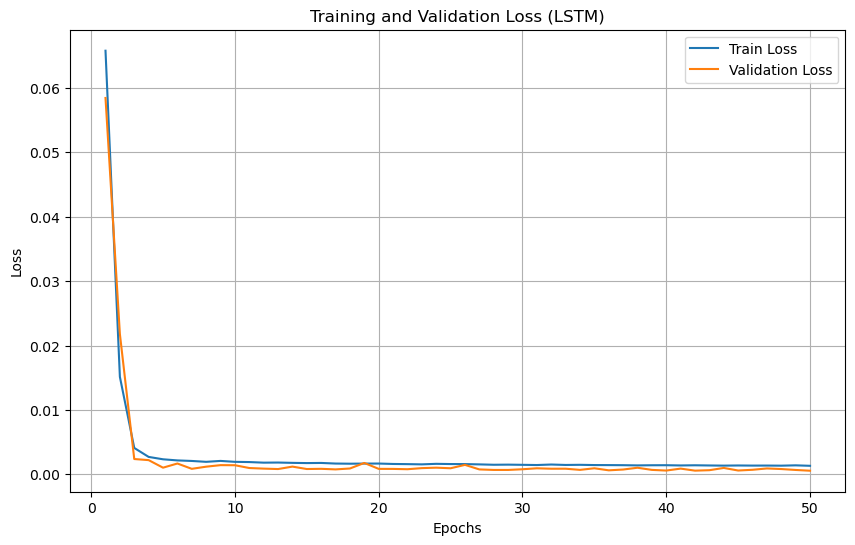

Test Loss: 0.0008


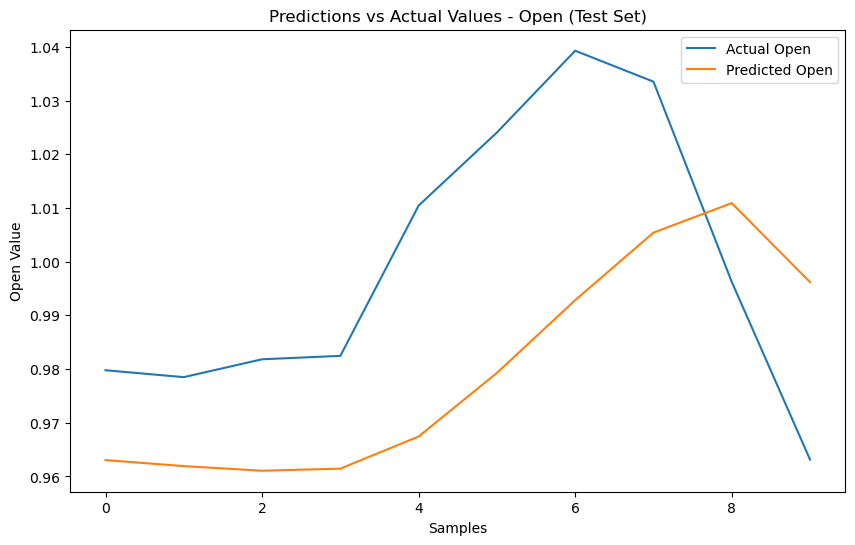

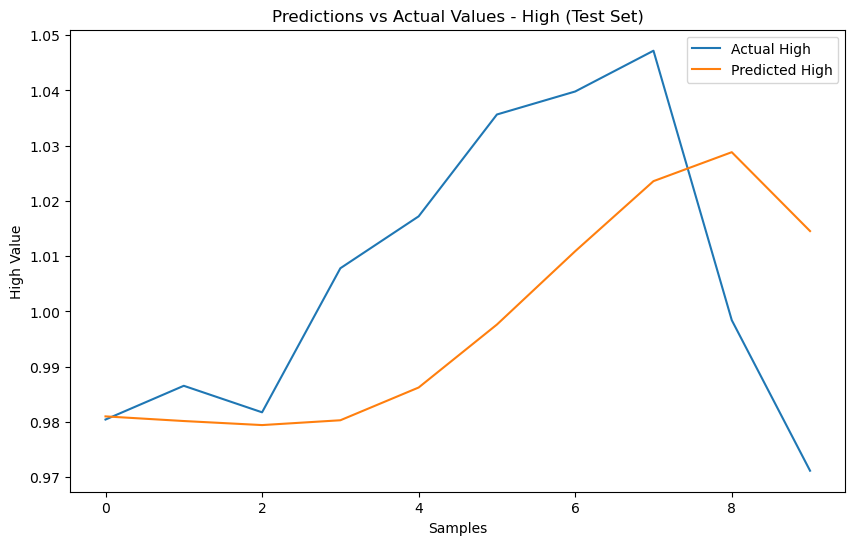

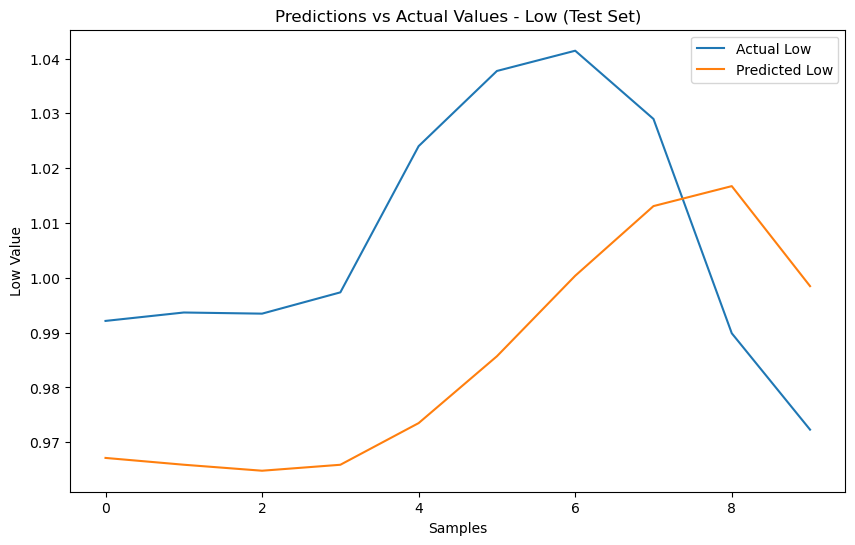

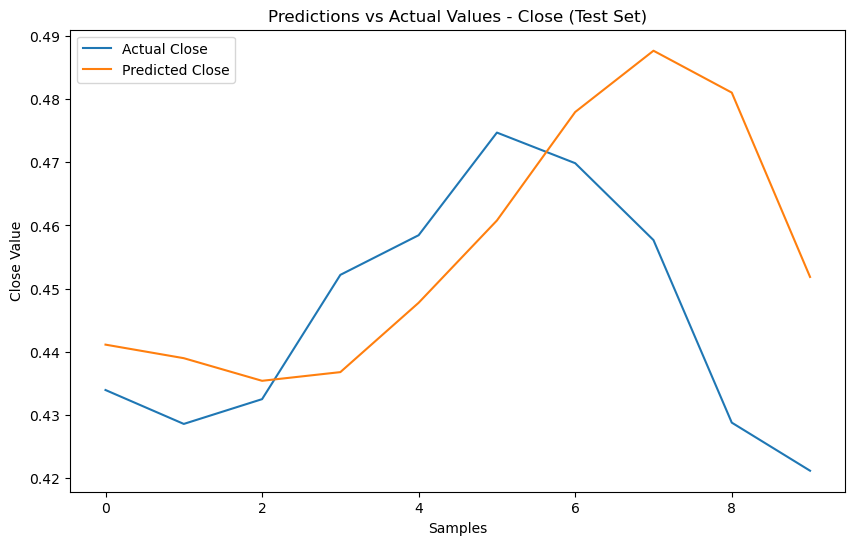

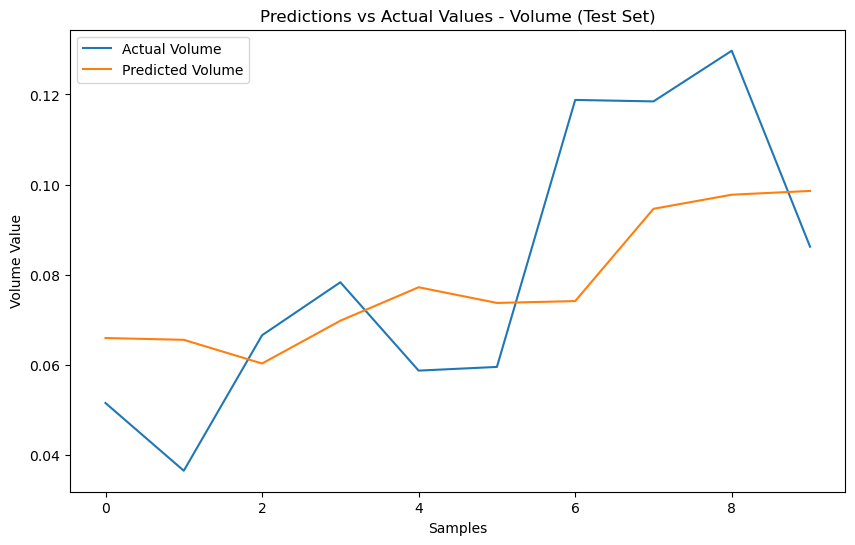

In [18]:
# Define LSTM model
class BasicLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        """
        Initialize the LSTM model
        :param input_size: Number of input features (e.g., Open, High, Low, Close, Volume)
        :param hidden_size: Number of hidden units in LSTM layers
        :param output_size: Number of output features (e.g., predicting Open, High, Low, Close, Volume)
        :param num_layers: Number of LSTM layers
        """
        super(BasicLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  
        out, _ = self.lstm(x, (h0, c0))  
        out = self.fc(out[:, -1, :])  
        return out

# Model parameter settings
input_size = 5  # Number of input features: Open, High, Low, Close, Volume
hidden_size = 64  # Size of the hidden layer
output_size = 5  # Number of output features
num_layers = 1  # Number of LSTM layers

# Initialize the model
model = BasicLSTM(input_size, hidden_size, output_size, num_layers)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Prepare datasets and data loaders
batch_size = 32
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Training process
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    # Training loop
    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training", unit="batch") as pbar:
        for X_batch, y_batch in pbar:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch[:, -1, :])
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            pbar.set_postfix({"Train Loss": loss.item()})

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation loop
    model.eval()
    val_loss = 0.0
    with tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation", unit="batch") as pbar:
        with torch.no_grad():
            for X_batch, y_batch in pbar:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch[:, -1, :])
                val_loss += loss.item()
                pbar.set_postfix({"Validation Loss": loss.item()})

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Visualize training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (LSTM)")
plt.legend()
plt.grid()
plt.show()

# Testing process
test_loss = 0.0
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch[:, -1, :])
        test_loss += loss.item()
        predictions.append(outputs.cpu().numpy())
        actuals.append(y_batch.cpu().numpy())

test_loss /= len(test_loader)
print(f"Test Loss: {test_loss:.4f}")

# Convert predictions and actual values to NumPy format
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Ensure the shape of actuals is correct
actuals = actuals.squeeze(axis=1)

# Plot predictions vs actual values for each feature
features = ['Open', 'High', 'Low', 'Close', 'Volume']
for i in range(output_size):
    plt.figure(figsize=(10, 6))
    plt.plot(actuals[:, i], label=f"Actual {features[i]}")
    plt.plot(predictions[:, i], label=f"Predicted {features[i]}")
    plt.legend()
    plt.title(f"Predictions vs Actual Values - {features[i]} (Test Set)")
    plt.xlabel("Samples")
    plt.ylabel(f"{features[i]} Value")
    plt.show()

Epoch 1/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 969.28batch/s, Validation Loss=0.0878]


Epoch [1/100] - Train Loss: 0.0815, Validation Loss: 0.0693


Epoch 2/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 944.37batch/s, Validation Loss=0.0109]


Epoch [2/100] - Train Loss: 0.0212, Validation Loss: 0.0100


Epoch 3/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 788.05batch/s, Validation Loss=0.00871]


Epoch [3/100] - Train Loss: 0.0088, Validation Loss: 0.0072


Epoch 4/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 890.11batch/s, Validation Loss=0.0053]


Epoch [4/100] - Train Loss: 0.0029, Validation Loss: 0.0035


Epoch 5/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 781.48batch/s, Validation Loss=0.00386]


Epoch [5/100] - Train Loss: 0.0025, Validation Loss: 0.0025


Epoch 6/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1115.40batch/s, Validation Loss=0.00281]


Epoch [6/100] - Train Loss: 0.0023, Validation Loss: 0.0024


Epoch 7/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 869.47batch/s, Validation Loss=0.00183]


Epoch [7/100] - Train Loss: 0.0022, Validation Loss: 0.0014


Epoch 8/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 788.38batch/s, Validation Loss=0.00194]


Epoch [8/100] - Train Loss: 0.0022, Validation Loss: 0.0014


Epoch 9/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1048.41batch/s, Validation Loss=0.00167]


Epoch [9/100] - Train Loss: 0.0020, Validation Loss: 0.0013


Epoch 10/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 602.02batch/s, Validation Loss=0.00163]


Epoch [10/100] - Train Loss: 0.0019, Validation Loss: 0.0013


Epoch 11/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 603.36batch/s, Validation Loss=0.00126]


Epoch [11/100] - Train Loss: 0.0019, Validation Loss: 0.0011


Epoch 12/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 855.89batch/s, Validation Loss=0.00153]


Epoch [12/100] - Train Loss: 0.0018, Validation Loss: 0.0012


Epoch 13/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 790.91batch/s, Validation Loss=0.000813]


Epoch [13/100] - Train Loss: 0.0018, Validation Loss: 0.0011


Epoch 14/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 891.34batch/s, Validation Loss=0.00108]


Epoch [14/100] - Train Loss: 0.0018, Validation Loss: 0.0010


Epoch 15/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 586.85batch/s, Validation Loss=0.0015]


Epoch [15/100] - Train Loss: 0.0018, Validation Loss: 0.0012


Epoch 16/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 773.05batch/s, Validation Loss=0.000829]


Epoch [16/100] - Train Loss: 0.0018, Validation Loss: 0.0009


Epoch 17/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 928.84batch/s, Validation Loss=0.000952]


Epoch [17/100] - Train Loss: 0.0017, Validation Loss: 0.0009


Epoch 18/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 997.81batch/s, Validation Loss=0.000996]


Epoch [18/100] - Train Loss: 0.0017, Validation Loss: 0.0010


Epoch 19/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 903.41batch/s, Validation Loss=0.00127]


Epoch [19/100] - Train Loss: 0.0018, Validation Loss: 0.0011


Epoch 20/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1206.65batch/s, Validation Loss=0.000615]


Epoch [20/100] - Train Loss: 0.0017, Validation Loss: 0.0008


Epoch 21/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 934.46batch/s, Validation Loss=0.00128]


Epoch [21/100] - Train Loss: 0.0017, Validation Loss: 0.0011


Epoch 22/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1025.56batch/s, Validation Loss=0.00124]


Epoch [22/100] - Train Loss: 0.0017, Validation Loss: 0.0011


Epoch 23/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 718.14batch/s, Validation Loss=0.000988]


Epoch [23/100] - Train Loss: 0.0017, Validation Loss: 0.0009


Epoch 24/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 670.99batch/s, Validation Loss=0.000926]


Epoch [24/100] - Train Loss: 0.0016, Validation Loss: 0.0009


Epoch 25/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 651.42batch/s, Validation Loss=0.00101]


Epoch [25/100] - Train Loss: 0.0016, Validation Loss: 0.0010


Epoch 26/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 802.51batch/s, Validation Loss=0.000814]


Epoch [26/100] - Train Loss: 0.0016, Validation Loss: 0.0010


Epoch 27/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 864.58batch/s, Validation Loss=0.000842]


Epoch [27/100] - Train Loss: 0.0016, Validation Loss: 0.0009


Epoch 28/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 839.68batch/s, Validation Loss=0.000745]


Epoch [28/100] - Train Loss: 0.0015, Validation Loss: 0.0008


Epoch 29/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 969.70batch/s, Validation Loss=0.000745]


Epoch [29/100] - Train Loss: 0.0016, Validation Loss: 0.0008


Epoch 30/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 797.26batch/s, Validation Loss=0.000708]


Epoch [30/100] - Train Loss: 0.0015, Validation Loss: 0.0007


Epoch 31/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1025.53batch/s, Validation Loss=0.00146]


Epoch [31/100] - Train Loss: 0.0016, Validation Loss: 0.0012


Epoch 32/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 917.46batch/s, Validation Loss=0.00087]


Epoch [32/100] - Train Loss: 0.0015, Validation Loss: 0.0009


Epoch 33/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 936.86batch/s, Validation Loss=0.000633]


Epoch [33/100] - Train Loss: 0.0015, Validation Loss: 0.0008


Epoch 34/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1025.25batch/s, Validation Loss=0.000891]


Epoch [34/100] - Train Loss: 0.0016, Validation Loss: 0.0009


Epoch 35/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 996.45batch/s, Validation Loss=0.000736]


Epoch [35/100] - Train Loss: 0.0015, Validation Loss: 0.0008


Epoch 36/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1017.76batch/s, Validation Loss=0.00079]


Epoch [36/100] - Train Loss: 0.0015, Validation Loss: 0.0008


Epoch 37/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1002.37batch/s, Validation Loss=0.00103]


Epoch [37/100] - Train Loss: 0.0015, Validation Loss: 0.0010


Epoch 38/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1016.83batch/s, Validation Loss=0.000445]


Epoch [38/100] - Train Loss: 0.0015, Validation Loss: 0.0006


Epoch 39/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 845.86batch/s, Validation Loss=0.000543]


Epoch [39/100] - Train Loss: 0.0015, Validation Loss: 0.0007


Epoch 40/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 689.61batch/s, Validation Loss=0.000658]


Epoch [40/100] - Train Loss: 0.0014, Validation Loss: 0.0007


Epoch 41/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 892.98batch/s, Validation Loss=0.000652]


Epoch [41/100] - Train Loss: 0.0014, Validation Loss: 0.0007


Epoch 42/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 647.33batch/s, Validation Loss=0.000442]


Epoch [42/100] - Train Loss: 0.0014, Validation Loss: 0.0006


Epoch 43/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 947.25batch/s, Validation Loss=0.000845]


Epoch [43/100] - Train Loss: 0.0015, Validation Loss: 0.0008


Epoch 44/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1031.65batch/s, Validation Loss=0.000693]


Epoch [44/100] - Train Loss: 0.0014, Validation Loss: 0.0008


Epoch 45/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 995.44batch/s, Validation Loss=0.000667]


Epoch [45/100] - Train Loss: 0.0014, Validation Loss: 0.0008


Epoch 46/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 625.25batch/s, Validation Loss=0.00046]


Epoch [46/100] - Train Loss: 0.0014, Validation Loss: 0.0006


Epoch 47/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 800.13batch/s, Validation Loss=0.000551]


Epoch [47/100] - Train Loss: 0.0014, Validation Loss: 0.0006


Epoch 48/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 943.07batch/s, Validation Loss=0.000526]


Epoch [48/100] - Train Loss: 0.0014, Validation Loss: 0.0007


Epoch 49/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 700.45batch/s, Validation Loss=0.000758]


Epoch [49/100] - Train Loss: 0.0014, Validation Loss: 0.0008


Epoch 50/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 870.53batch/s, Validation Loss=0.00054]


Epoch [50/100] - Train Loss: 0.0014, Validation Loss: 0.0007


Epoch 51/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 948.96batch/s, Validation Loss=0.000973]


Epoch [51/100] - Train Loss: 0.0014, Validation Loss: 0.0010


Epoch 52/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 840.58batch/s, Validation Loss=0.000464]


Epoch [52/100] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 53/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 699.41batch/s, Validation Loss=0.000456]


Epoch [53/100] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 54/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 688.23batch/s, Validation Loss=0.000863]


Epoch [54/100] - Train Loss: 0.0014, Validation Loss: 0.0008


Epoch 55/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 815.08batch/s, Validation Loss=0.000715]


Epoch [55/100] - Train Loss: 0.0013, Validation Loss: 0.0008


Epoch 56/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 775.91batch/s, Validation Loss=0.000846]


Epoch [56/100] - Train Loss: 0.0013, Validation Loss: 0.0008


Epoch 57/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 853.87batch/s, Validation Loss=0.000543]


Epoch [57/100] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 58/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 806.02batch/s, Validation Loss=0.000345]


Epoch [58/100] - Train Loss: 0.0013, Validation Loss: 0.0005


Epoch 59/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 899.08batch/s, Validation Loss=0.000445]


Epoch [59/100] - Train Loss: 0.0013, Validation Loss: 0.0005


Epoch 60/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 942.04batch/s, Validation Loss=0.000497]


Epoch [60/100] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 61/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 524.87batch/s, Validation Loss=0.000966]


Epoch [61/100] - Train Loss: 0.0013, Validation Loss: 0.0009


Epoch 62/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 546.69batch/s, Validation Loss=0.000734]


Epoch [62/100] - Train Loss: 0.0013, Validation Loss: 0.0007


Epoch 63/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 940.24batch/s, Validation Loss=0.000762]


Epoch [63/100] - Train Loss: 0.0013, Validation Loss: 0.0008


Epoch 64/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 888.88batch/s, Validation Loss=0.000331]


Epoch [64/100] - Train Loss: 0.0013, Validation Loss: 0.0005


Epoch 65/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 880.58batch/s, Validation Loss=0.000643]


Epoch [65/100] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 66/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 584.48batch/s, Validation Loss=0.000537]


Epoch [66/100] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 67/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 555.42batch/s, Validation Loss=0.000338]


Epoch [67/100] - Train Loss: 0.0013, Validation Loss: 0.0005


Epoch 68/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 938.95batch/s, Validation Loss=0.000587]


Epoch [68/100] - Train Loss: 0.0013, Validation Loss: 0.0007


Epoch 69/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1045.08batch/s, Validation Loss=0.000827]


Epoch [69/100] - Train Loss: 0.0013, Validation Loss: 0.0008


Epoch 70/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 835.48batch/s, Validation Loss=0.000498]


Epoch [70/100] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 71/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 890.79batch/s, Validation Loss=0.000383]


Epoch [71/100] - Train Loss: 0.0013, Validation Loss: 0.0005


Epoch 72/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 929.49batch/s, Validation Loss=0.000408]


Epoch [72/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 73/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 997.99batch/s, Validation Loss=0.000502]


Epoch [73/100] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 74/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 872.29batch/s, Validation Loss=0.00057]


Epoch [74/100] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 75/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 895.26batch/s, Validation Loss=0.000404]


Epoch 00075: reducing learning rate of group 0 to 8.0000e-04.
Epoch [75/100] - Train Loss: 0.0013, Validation Loss: 0.0005


Epoch 76/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 881.25batch/s, Validation Loss=0.000622]


Epoch [76/100] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 77/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 592.88batch/s, Validation Loss=0.000295]


Epoch [77/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 78/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 758.10batch/s, Validation Loss=0.000418]


Epoch [78/100] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 79/100 - Validation: 100%|██████████| 8/8 [00:00<00:00, 644.73batch/s, Validation Loss=0.000435]


Early stopping triggered.


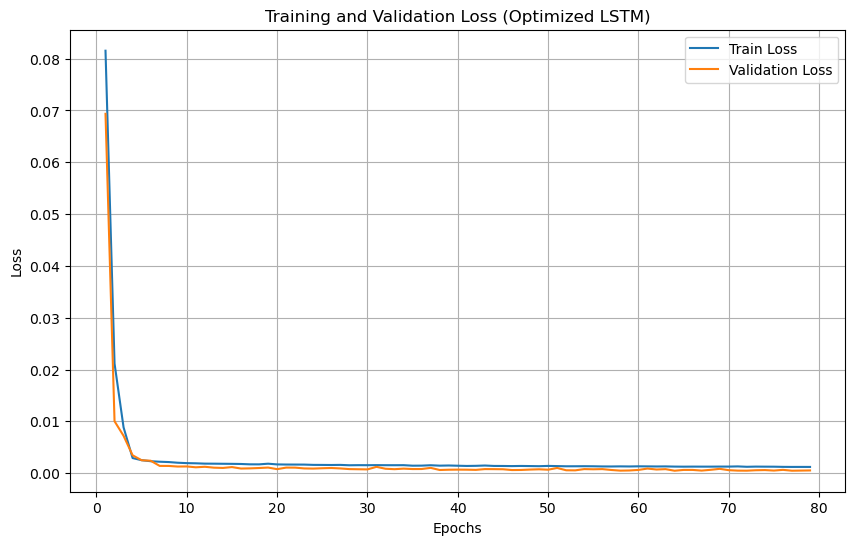

Test Loss: 0.0006


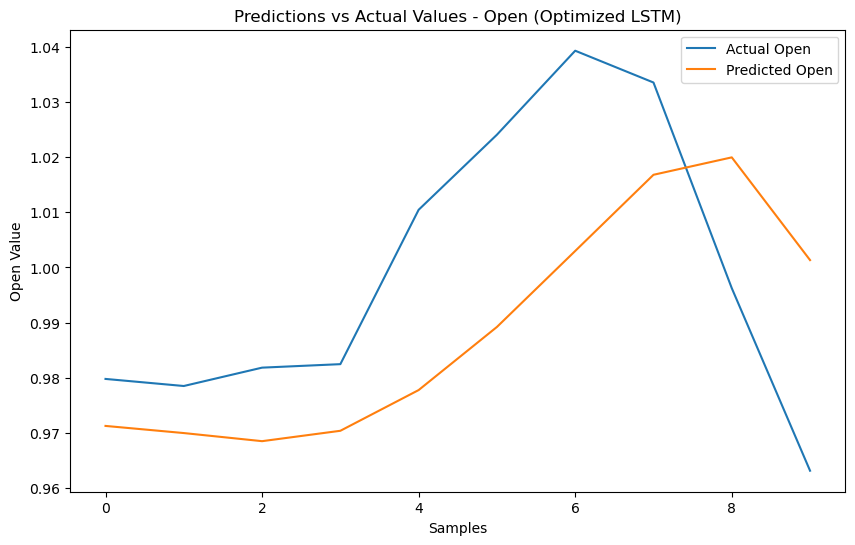

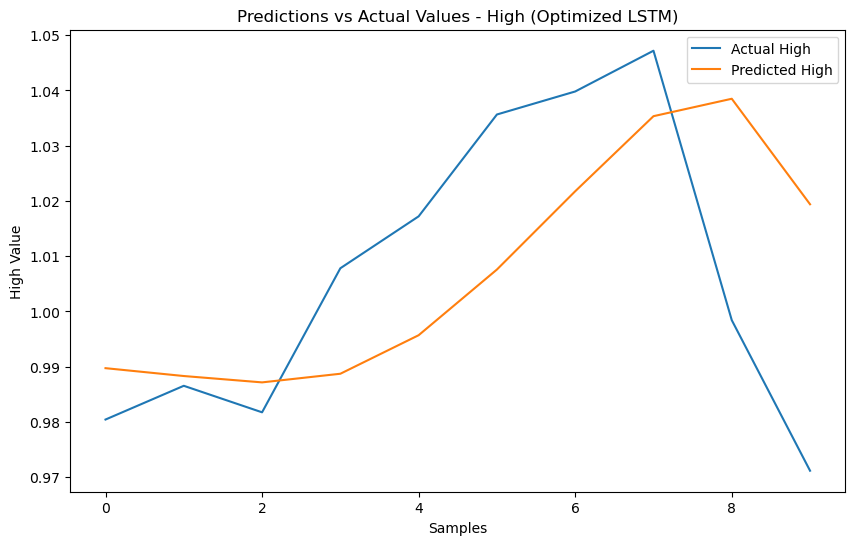

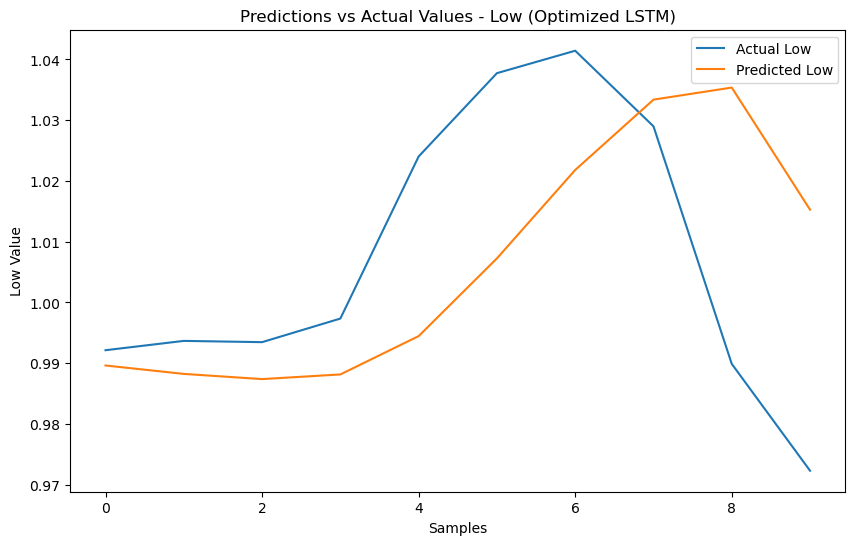

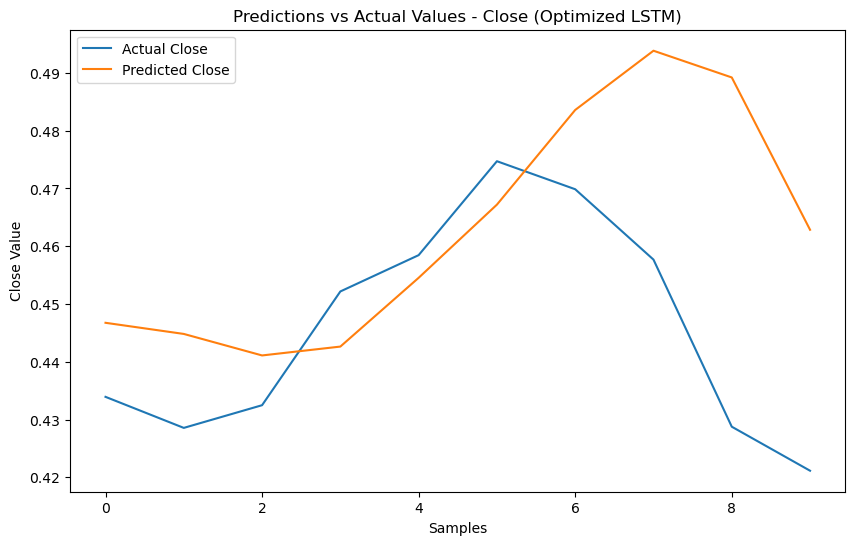

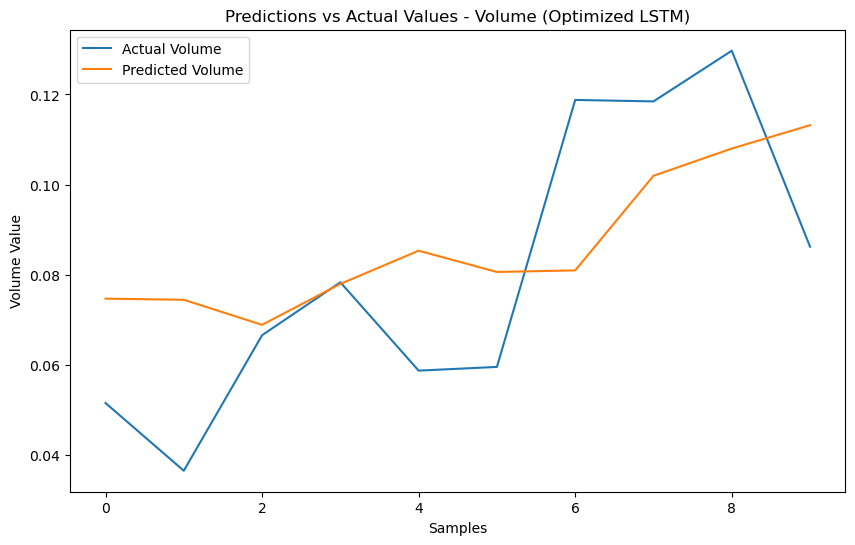

In [20]:
# Simplified LSTM model
class SimplifiedLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, dropout=0.2):
        super(SimplifiedLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Take the last time step
        return out

# Model parameters
input_size = 5
hidden_size = 64  # Reduce the number of hidden units
output_size = 5
num_layers = 1  # Simplify to a single-layer LSTM
dropout = 0.2  # Reduce dropout

# Initialize the model
model = SimplifiedLSTM(input_size, hidden_size, output_size, num_layers, dropout)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-6)  # 减少权重衰减
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=10, verbose=True)

# Early stopping parameters
early_stopping_patience = 15
best_val_loss = float('inf')
early_stopping_counter = 0

# Training and validation loop
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training", unit="batch") as pbar:
        for X_batch, y_batch in pbar:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch[:, -1, :])
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            pbar.set_postfix({"Train Loss": loss.item()})

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    with tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation", unit="batch") as pbar:
        with torch.no_grad():
            for X_batch, y_batch in pbar:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch[:, -1, :])
                val_loss += loss.item()
                pbar.set_postfix({"Validation Loss": loss.item()})

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    scheduler.step(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), "best_model.pth")
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


# Visualize training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (Optimized LSTM)")
plt.legend()
plt.grid()
plt.show()

# Test the model
model.load_state_dict(torch.load("best_model.pth"))
model.eval()
test_loss = 0.0
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch[:, -1, :])
        test_loss += loss.item()
        predictions.append(outputs.cpu().numpy())
        actuals.append(y_batch.cpu().numpy())

test_loss /= len(test_loader)
print(f"Test Loss: {test_loss:.4f}")

# Convert predictions and actual values to the correct format
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)
actuals = actuals.squeeze(axis=1)  # Remove unnecessary dimensions

# Plot predictions vs actual values
features = ['Open', 'High', 'Low', 'Close', 'Volume']
for i in range(output_size):
    plt.figure(figsize=(10, 6))
    plt.plot(actuals[:, i], label=f"Actual {features[i]}")
    plt.plot(predictions[:, i], label=f"Predicted {features[i]}")
    plt.legend()
    plt.title(f"Predictions vs Actual Values - {features[i]} (Optimized LSTM)")
    plt.xlabel("Samples")
    plt.ylabel(f"{features[i]} Value")
    plt.show()

# GRU model

C:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Reset N_test = 10, M_test = 1 before GRU model creation.
Window start: 0, Window end: 10
Window start: 1, Window end: 11
Window start: 2, Window end: 12
Window start: 3, Window end: 13
Window start: 4, Window end: 14
Window start: 5, Window end: 15
Window start: 6, Window end: 16
Window start: 7, Window end: 17
Window start: 8, Window end: 18
Window start: 9, Window end: 19
Generated 10 samples.
After resetting, X_test shape: (10, 10, 5), y_test shape: (10, 1, 5)


Epoch 1/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 459.53batch/s, Validation Loss=0.0464]


Epoch [1/50] - Train Loss: 0.0699, Validation Loss: 0.0344


Epoch 2/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 274.29batch/s, Validation Loss=0.00903]


Epoch [2/50] - Train Loss: 0.0142, Validation Loss: 0.0060


Epoch 3/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 279.48batch/s, Validation Loss=0.00207]


Epoch [3/50] - Train Loss: 0.0042, Validation Loss: 0.0015


Epoch 4/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 698.91batch/s, Validation Loss=0.000699]


Epoch [4/50] - Train Loss: 0.0021, Validation Loss: 0.0009


Epoch 5/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 329.07batch/s, Validation Loss=0.00075]


Epoch [5/50] - Train Loss: 0.0018, Validation Loss: 0.0009


Epoch 6/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 486.06batch/s, Validation Loss=0.00115]


Epoch [6/50] - Train Loss: 0.0017, Validation Loss: 0.0011


Epoch 7/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 542.21batch/s, Validation Loss=0.00041]


Epoch [7/50] - Train Loss: 0.0017, Validation Loss: 0.0006


Epoch 8/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 964.21batch/s, Validation Loss=0.00139]


Epoch [8/50] - Train Loss: 0.0017, Validation Loss: 0.0014


Epoch 9/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1169.55batch/s, Validation Loss=0.000413]


Epoch [9/50] - Train Loss: 0.0017, Validation Loss: 0.0006


Epoch 10/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 674.68batch/s, Validation Loss=0.000373]


Epoch [10/50] - Train Loss: 0.0016, Validation Loss: 0.0007


Epoch 11/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 701.54batch/s, Validation Loss=0.000852]


Epoch [11/50] - Train Loss: 0.0016, Validation Loss: 0.0007


Epoch 12/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 798.71batch/s, Validation Loss=0.000527]


Epoch [12/50] - Train Loss: 0.0015, Validation Loss: 0.0007


Epoch 13/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 936.28batch/s, Validation Loss=0.000684]


Epoch [13/50] - Train Loss: 0.0015, Validation Loss: 0.0007


Epoch 14/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 553.97batch/s, Validation Loss=0.00106]


Epoch [14/50] - Train Loss: 0.0014, Validation Loss: 0.0010


Epoch 15/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 703.99batch/s, Validation Loss=0.000468]


Epoch [15/50] - Train Loss: 0.0014, Validation Loss: 0.0006


Epoch 16/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1013.39batch/s, Validation Loss=0.000577]


Epoch [16/50] - Train Loss: 0.0014, Validation Loss: 0.0006


Epoch 17/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 954.82batch/s, Validation Loss=0.000343]


Epoch [17/50] - Train Loss: 0.0014, Validation Loss: 0.0005


Epoch 18/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 877.29batch/s, Validation Loss=0.000615]


Epoch [18/50] - Train Loss: 0.0014, Validation Loss: 0.0007


Epoch 19/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 634.55batch/s, Validation Loss=0.000431]


Epoch [19/50] - Train Loss: 0.0014, Validation Loss: 0.0006


Epoch 20/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 732.92batch/s, Validation Loss=0.000703]


Epoch [20/50] - Train Loss: 0.0014, Validation Loss: 0.0007


Epoch 21/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1003.21batch/s, Validation Loss=0.000863]


Epoch [21/50] - Train Loss: 0.0014, Validation Loss: 0.0008


Epoch 22/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1046.94batch/s, Validation Loss=0.00093]


Epoch [22/50] - Train Loss: 0.0013, Validation Loss: 0.0008


Epoch 23/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 842.02batch/s, Validation Loss=0.000373]


Epoch [23/50] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 24/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 850.79batch/s, Validation Loss=0.00113]


Epoch [24/50] - Train Loss: 0.0013, Validation Loss: 0.0010


Epoch 25/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 882.59batch/s, Validation Loss=0.000591]


Epoch [25/50] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 26/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 997.07batch/s, Validation Loss=0.000541]


Epoch [26/50] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 27/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1182.99batch/s, Validation Loss=0.000375]


Epoch [27/50] - Train Loss: 0.0013, Validation Loss: 0.0005


Epoch 28/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 933.26batch/s, Validation Loss=0.000636]


Epoch [28/50] - Train Loss: 0.0013, Validation Loss: 0.0006


Epoch 29/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 986.34batch/s, Validation Loss=0.000351]


Epoch [29/50] - Train Loss: 0.0013, Validation Loss: 0.0005


Epoch 30/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1056.60batch/s, Validation Loss=0.000569]


Epoch [30/50] - Train Loss: 0.0013, Validation Loss: 0.0007


Epoch 31/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 974.48batch/s, Validation Loss=0.000345]


Epoch [31/50] - Train Loss: 0.0013, Validation Loss: 0.0005


Epoch 32/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1010.55batch/s, Validation Loss=0.000269]


Epoch [32/50] - Train Loss: 0.0013, Validation Loss: 0.0005


Epoch 33/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1158.41batch/s, Validation Loss=0.000334]


Epoch [33/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 34/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1177.31batch/s, Validation Loss=0.000637]


Epoch [34/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 35/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1178.34batch/s, Validation Loss=0.000218]


Epoch [35/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 36/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1012.08batch/s, Validation Loss=0.000394]


Epoch [36/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 37/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1099.14batch/s, Validation Loss=0.000517]


Epoch [37/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 38/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1004.68batch/s, Validation Loss=0.000559]


Epoch [38/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 39/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 997.22batch/s, Validation Loss=0.000414]


Epoch [39/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 40/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1053.32batch/s, Validation Loss=0.000606]


Epoch [40/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 41/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 975.45batch/s, Validation Loss=0.000828]


Epoch [41/50] - Train Loss: 0.0012, Validation Loss: 0.0007


Epoch 42/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1016.52batch/s, Validation Loss=0.000509]


Epoch [42/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 43/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1021.57batch/s, Validation Loss=0.00045]


Epoch [43/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 44/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 992.85batch/s, Validation Loss=0.000418]


Epoch [44/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 45/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1105.87batch/s, Validation Loss=0.000517]


Epoch [45/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 46/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1050.81batch/s, Validation Loss=0.000469]


Epoch [46/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 47/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 977.61batch/s, Validation Loss=0.000519]


Epoch [47/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 48/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1030.29batch/s, Validation Loss=0.00049]


Epoch [48/50] - Train Loss: 0.0012, Validation Loss: 0.0006


Epoch 49/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1086.26batch/s, Validation Loss=0.000327]


Epoch [49/50] - Train Loss: 0.0012, Validation Loss: 0.0005


Epoch 50/50 - Validation: 100%|██████████| 8/8 [00:00<00:00, 1005.14batch/s, Validation Loss=0.000295]


Epoch [50/50] - Train Loss: 0.0012, Validation Loss: 0.0004


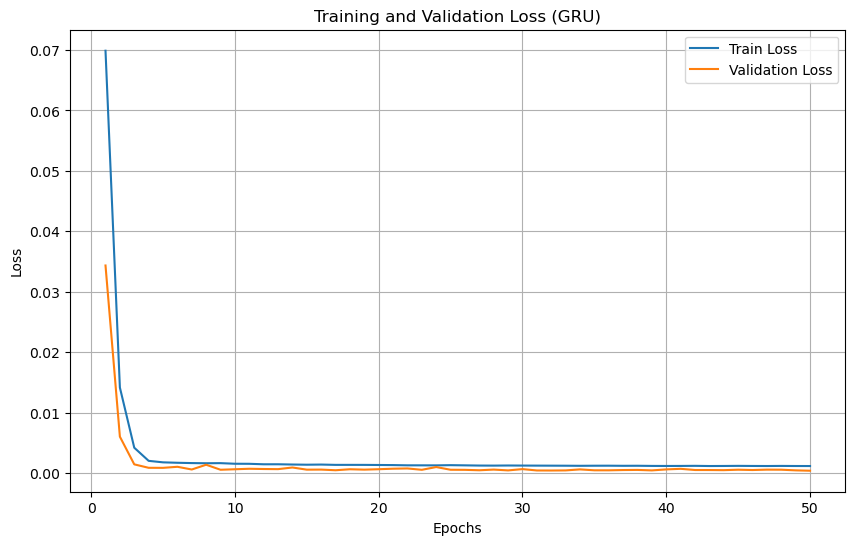

Test Loss: 0.0007


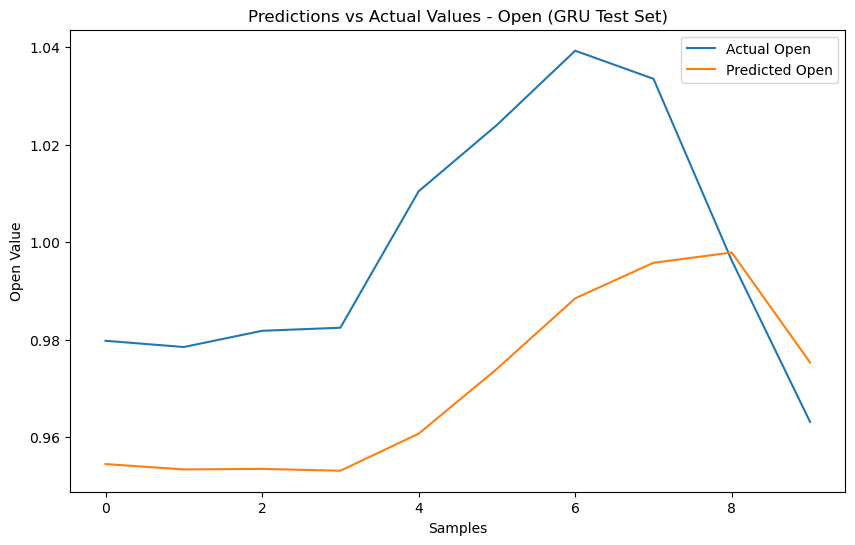

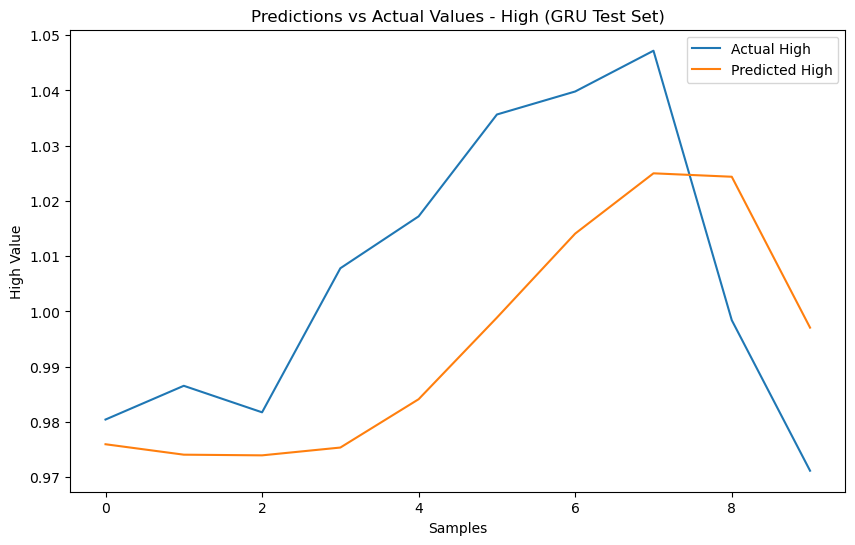

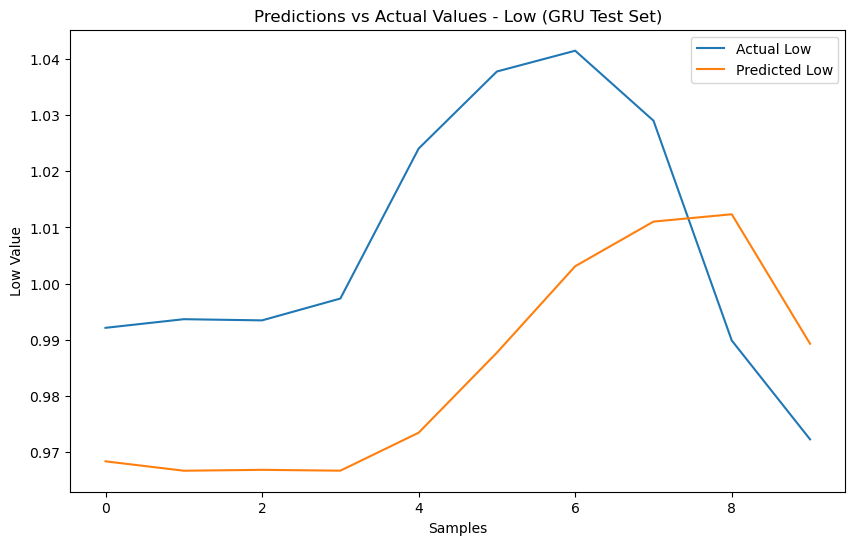

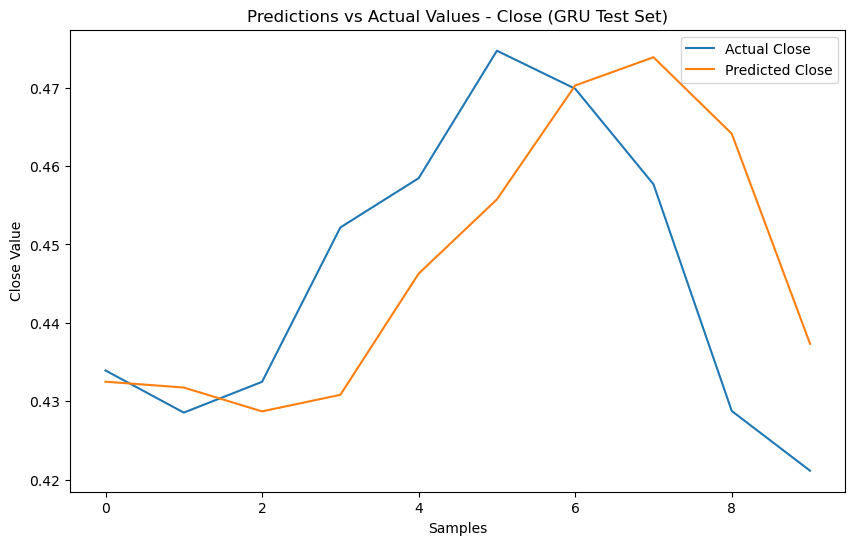

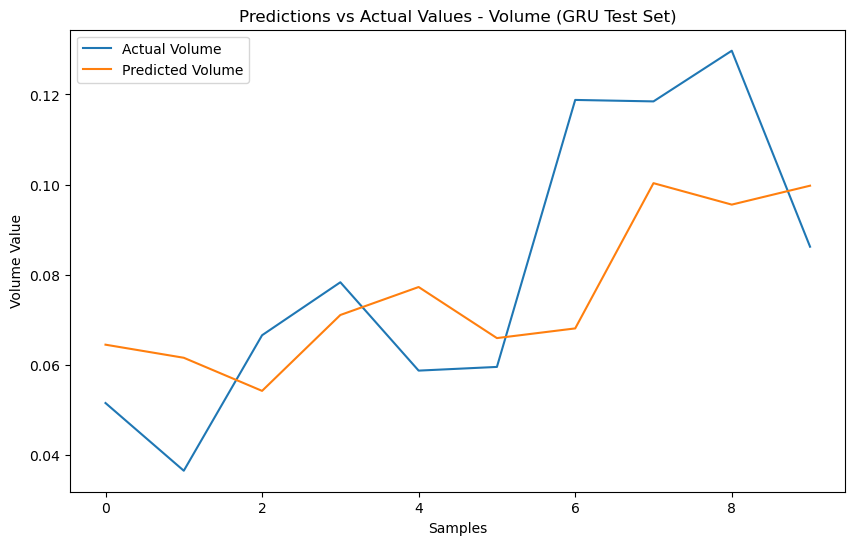

In [46]:
# Explicitly reset N_test and M_test
N_test, M_test = 10, 1  
print(f"Reset N_test = {N_test}, M_test = {M_test} before GRU model creation.")

# Regenerate sliding window
X_test, y_test = create_sequences(scaled_test_data, N_test, M_test)
print(f"After resetting, X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Check if the number of generated samples meets expectations
if X_test.shape[0] == 0:
    raise ValueError("Test data too short to generate sliding window samples. Check scaled_test_data length.")

# Create GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, dropout=0.2):
        """
        Initialize GRU model.

        :param input_size: Number of input features (e.g., Open, High, Low, Close, Volume)
        :param hidden_size: Number of units in the hidden layer
        :param output_size: Number of output features (e.g., predict Open, High, Low, Close, Volume)
        :param num_layers: Number of GRU layers
        :param dropout: Dropout rate
        """
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the last time step
        return out

# Model parameter settings
input_size = 5  # Open, High, Low, Close, Volume
hidden_size = 64  
output_size = 5  
num_layers = 1 
dropout = 0.2  

# Initialize the model
model = GRUModel(input_size, hidden_size, output_size, num_layers, dropout)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Prepare datasets and data loaders
batch_size = 32
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Training process
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training", unit="batch") as pbar:
        for X_batch, y_batch in pbar:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch[:, -1, :])
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            pbar.set_postfix({"Train Loss": loss.item()})

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Training loop
    model.eval()
    val_loss = 0.0
    with tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation", unit="batch") as pbar:
        with torch.no_grad():
            for X_batch, y_batch in pbar:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch[:, -1, :])
                val_loss += loss.item()
                pbar.set_postfix({"Validation Loss": loss.item()})

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (GRU)")
plt.legend()
plt.grid()
plt.show()

test_loss = 0.0
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch[:, -1, :])
        test_loss += loss.item()
        predictions.append(outputs.cpu().numpy())
        actuals.append(y_batch.cpu().numpy())

test_loss /= len(test_loader)
print(f"Test Loss: {test_loss:.4f}")

predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)
actuals = actuals.squeeze(axis=1)  

features = ['Open', 'High', 'Low', 'Close', 'Volume']
for i in range(output_size):
    plt.figure(figsize=(10, 6))
    plt.plot(actuals[:, i], label=f"Actual {features[i]}")
    plt.plot(predictions[:, i], label=f"Predicted {features[i]}")
    plt.legend()
    plt.title(f"Predictions vs Actual Values - {features[i]} (GRU Test Set)")
    plt.xlabel("Samples")
    plt.ylabel(f"{features[i]} Value")
    plt.show()

Epoch 1/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 695.10batch/s, Validation Loss=0.00459]


Epoch [1/50] - Train Loss: 0.0385, Validation Loss: 0.0030


Epoch 2/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 926.67batch/s, Validation Loss=0.00344]


Epoch [2/50] - Train Loss: 0.0050, Validation Loss: 0.0029


Epoch 3/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 907.47batch/s, Validation Loss=0.00584]


Epoch [3/50] - Train Loss: 0.0037, Validation Loss: 0.0038


Epoch 4/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 761.98batch/s, Validation Loss=0.00212]


Epoch [4/50] - Train Loss: 0.0030, Validation Loss: 0.0017


Epoch 5/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 684.34batch/s, Validation Loss=0.00146]


Epoch [5/50] - Train Loss: 0.0030, Validation Loss: 0.0014


Epoch 6/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 985.35batch/s, Validation Loss=0.00072]


Epoch [6/50] - Train Loss: 0.0025, Validation Loss: 0.0008


Epoch 7/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 537.50batch/s, Validation Loss=0.000947]


Epoch [7/50] - Train Loss: 0.0024, Validation Loss: 0.0009


Epoch 8/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 1045.39batch/s, Validation Loss=0.000863]


Epoch [8/50] - Train Loss: 0.0024, Validation Loss: 0.0009


Epoch 9/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 726.83batch/s, Validation Loss=0.00184]


Epoch [9/50] - Train Loss: 0.0025, Validation Loss: 0.0015


Epoch 10/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 838.42batch/s, Validation Loss=0.00235]


Epoch [10/50] - Train Loss: 0.0023, Validation Loss: 0.0020


Epoch 11/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 633.87batch/s, Validation Loss=0.00039]


Epoch [11/50] - Train Loss: 0.0022, Validation Loss: 0.0008


Epoch 12/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 775.50batch/s, Validation Loss=0.00178]


Epoch [12/50] - Train Loss: 0.0023, Validation Loss: 0.0017


Epoch 13/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 969.54batch/s, Validation Loss=0.00101]


Epoch [13/50] - Train Loss: 0.0023, Validation Loss: 0.0010


Epoch 14/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 806.12batch/s, Validation Loss=0.000966]


Epoch [14/50] - Train Loss: 0.0021, Validation Loss: 0.0009


Epoch 15/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 894.71batch/s, Validation Loss=0.00171]


Epoch [15/50] - Train Loss: 0.0020, Validation Loss: 0.0015


Epoch 16/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 972.18batch/s, Validation Loss=0.000949]


Epoch [16/50] - Train Loss: 0.0020, Validation Loss: 0.0010


Epoch 17/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 1006.33batch/s, Validation Loss=0.0012]


Epoch [17/50] - Train Loss: 0.0020, Validation Loss: 0.0011


Epoch 18/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 1030.68batch/s, Validation Loss=0.000335]


Epoch [18/50] - Train Loss: 0.0020, Validation Loss: 0.0007


Epoch 19/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 1089.39batch/s, Validation Loss=0.000907]


Epoch [19/50] - Train Loss: 0.0020, Validation Loss: 0.0008


Epoch 20/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 1031.45batch/s, Validation Loss=0.000536]


Epoch [20/50] - Train Loss: 0.0018, Validation Loss: 0.0007


Epoch 21/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 1000.01batch/s, Validation Loss=0.000714]


Epoch [21/50] - Train Loss: 0.0017, Validation Loss: 0.0007


Epoch 22/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 1055.40batch/s, Validation Loss=0.00108]


Epoch [22/50] - Train Loss: 0.0019, Validation Loss: 0.0016


Epoch 23/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 980.11batch/s, Validation Loss=0.000431]


Epoch [23/50] - Train Loss: 0.0018, Validation Loss: 0.0005


Epoch 24/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 1077.65batch/s, Validation Loss=0.00147]


Epoch [24/50] - Train Loss: 0.0018, Validation Loss: 0.0012


Epoch 25/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 1011.42batch/s, Validation Loss=0.000415]


Epoch [25/50] - Train Loss: 0.0018, Validation Loss: 0.0007


Epoch 26/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 895.90batch/s, Validation Loss=0.000346]


Epoch [26/50] - Train Loss: 0.0018, Validation Loss: 0.0005


Epoch 27/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 871.31batch/s, Validation Loss=0.000791]


Epoch [27/50] - Train Loss: 0.0016, Validation Loss: 0.0008


Epoch 28/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 942.70batch/s, Validation Loss=0.000417]


Epoch [28/50] - Train Loss: 0.0016, Validation Loss: 0.0005


Epoch 29/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 964.59batch/s, Validation Loss=0.000435]


Epoch [29/50] - Train Loss: 0.0017, Validation Loss: 0.0006


Epoch 30/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 1044.26batch/s, Validation Loss=0.000444]


Epoch [30/50] - Train Loss: 0.0016, Validation Loss: 0.0005


Epoch 31/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 949.14batch/s, Validation Loss=0.000528]


Epoch [31/50] - Train Loss: 0.0015, Validation Loss: 0.0006


Epoch 32/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 811.46batch/s, Validation Loss=0.000523]


Epoch [32/50] - Train Loss: 0.0016, Validation Loss: 0.0006


Epoch 33/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 1004.50batch/s, Validation Loss=0.000569]


Epoch [33/50] - Train Loss: 0.0015, Validation Loss: 0.0006


Epoch 34/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 959.39batch/s, Validation Loss=0.000651]


Epoch [34/50] - Train Loss: 0.0015, Validation Loss: 0.0007


Epoch 35/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 955.42batch/s, Validation Loss=0.000662]


Epoch [35/50] - Train Loss: 0.0016, Validation Loss: 0.0008


Epoch 36/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 909.81batch/s, Validation Loss=0.000576]


Epoch [36/50] - Train Loss: 0.0015, Validation Loss: 0.0007


Epoch 37/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 862.95batch/s, Validation Loss=0.000524]


Epoch [37/50] - Train Loss: 0.0015, Validation Loss: 0.0005


Epoch 38/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 1079.24batch/s, Validation Loss=0.000508]


Epoch [38/50] - Train Loss: 0.0016, Validation Loss: 0.0005


Epoch 39/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 947.35batch/s, Validation Loss=0.000233]


Epoch [39/50] - Train Loss: 0.0015, Validation Loss: 0.0005


Epoch 40/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 1043.57batch/s, Validation Loss=0.000414]


Epoch [40/50] - Train Loss: 0.0014, Validation Loss: 0.0005


Epoch 41/50 - Validation: 100%|██████████| 15/15 [00:00<00:00, 978.88batch/s, Validation Loss=0.000474]


Early stopping triggered.


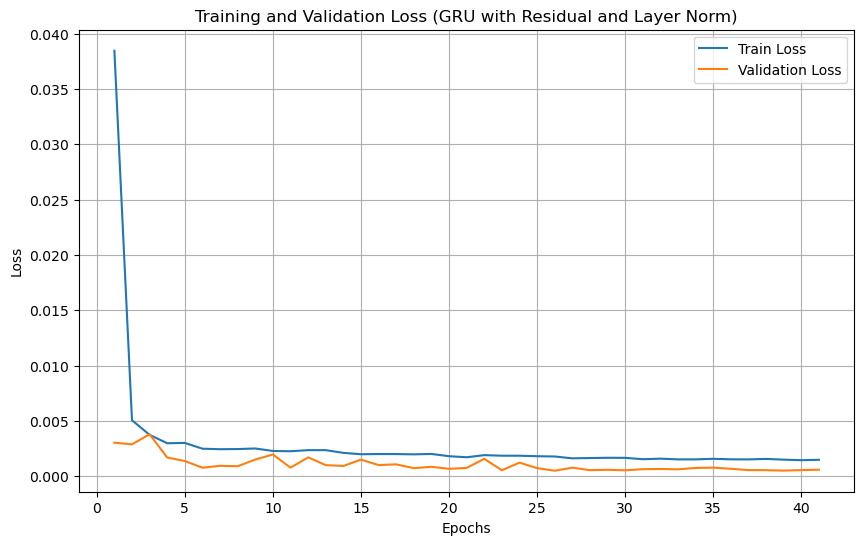

Test Loss: 0.0008


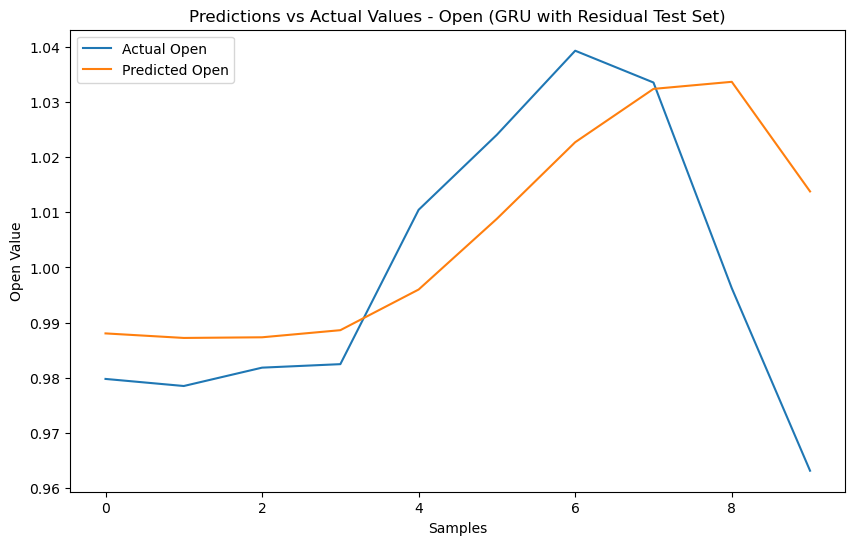

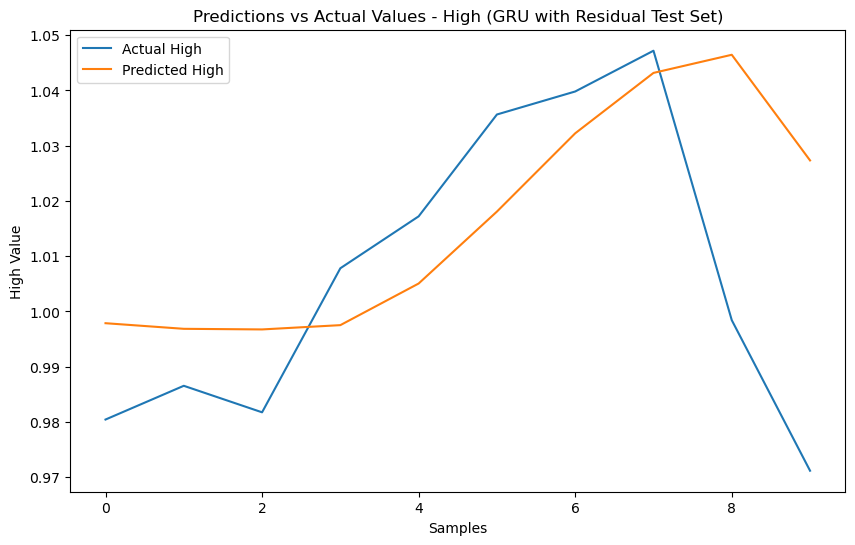

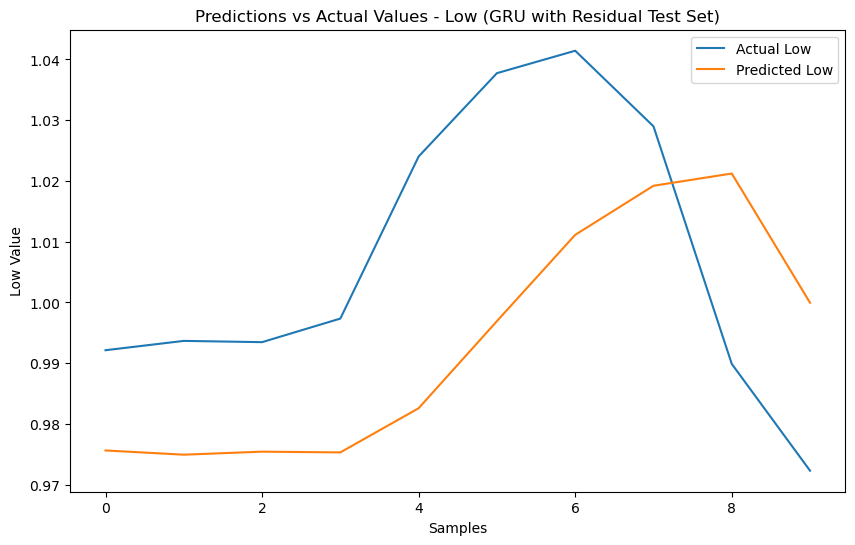

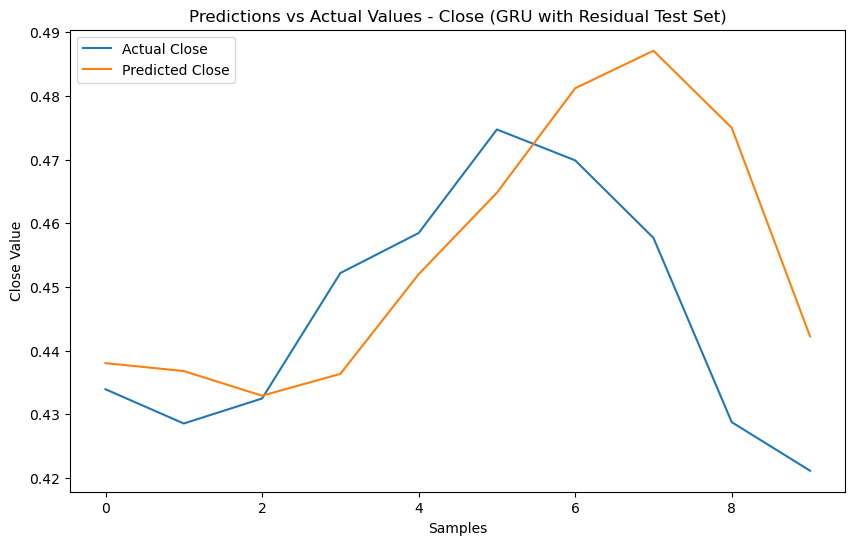

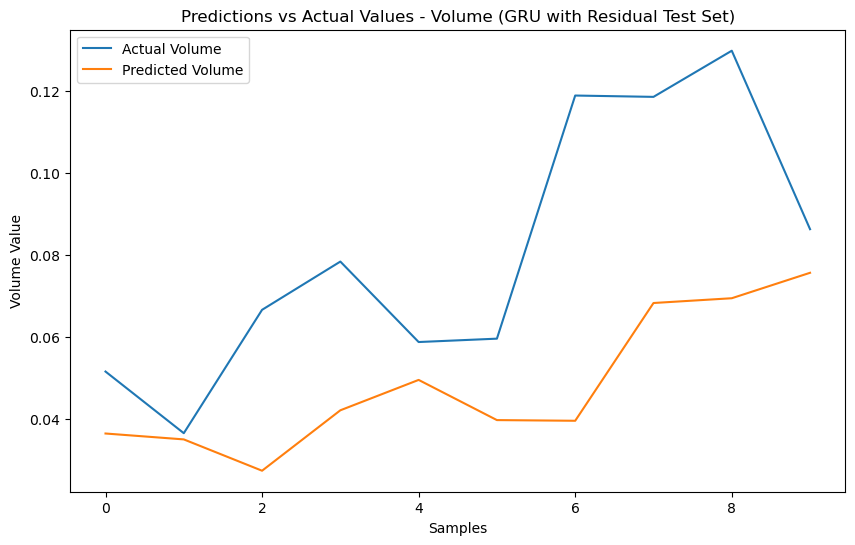

In [88]:
# GRU Model: Introduces Residual Connection and Layer Normalization
class GRUWithResidual(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0.3):
        super(GRUWithResidual, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Multi-layer GRU
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.layer_norm = nn.LayerNorm(hidden_size)  # Layer Normalization

        # Output layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Forward pass through GRU
        gru_out, _ = self.gru(x)

        # Use the output from the last time step and apply residual connection
        last_hidden_state = gru_out[:, -1, :]
        norm_out = self.layer_norm(last_hidden_state)
        residual_out = norm_out + last_hidden_state  # Residual connection

        # Output layer
        out = self.fc(residual_out)
        return out


# Model parameters
input_size = 5
hidden_size = 128  
output_size = 5
num_layers = 2  
dropout = 0.3

# Initialize the model
model = GRUWithResidual(input_size, hidden_size, output_size, num_layers, dropout)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-6)

# Use cosine annealing learning rate scheduler
scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-6)

# Prepare datasets and data loaders
batch_size = 16
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Early stopping parameters
early_stopping_patience = 15
best_val_loss = float('inf')
early_stopping_counter = 0

# Training loop
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training", unit="batch") as pbar:
        for X_batch, y_batch in pbar:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch[:, -1, :])
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            pbar.set_postfix({"Train Loss": loss.item()})

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    with tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation", unit="batch") as pbar:
        with torch.no_grad():
            for X_batch, y_batch in pbar:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch[:, -1, :])
                val_loss += loss.item()
                pbar.set_postfix({"Validation Loss": loss.item()})

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    scheduler.step()  

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (GRU with Residual and Layer Norm)")
plt.legend()
plt.grid()
plt.show()

model.eval()
test_loss = 0.0
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch[:, -1, :])
        test_loss += loss.item()
        predictions.append(outputs.cpu().numpy())
        actuals.append(y_batch.cpu().numpy())

test_loss /= len(test_loader)
print(f"Test Loss: {test_loss:.4f}")

predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)
actuals = actuals.squeeze(axis=1)

features = ['Open', 'High', 'Low', 'Close', 'Volume']
for i in range(output_size):
    plt.figure(figsize=(10, 6))
    plt.plot(actuals[:, i], label=f"Actual {features[i]}")
    plt.plot(predictions[:, i], label=f"Predicted {features[i]}")
    plt.legend()
    plt.title(f"Predictions vs Actual Values - {features[i]} (GRU with Residual Test Set)")
    plt.xlabel("Samples")
    plt.ylabel(f"{features[i]} Value")
    plt.show()